<a href="https://colab.research.google.com/github/DylanAdlan/Capstone-Project/blob/main/Fuel_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 2

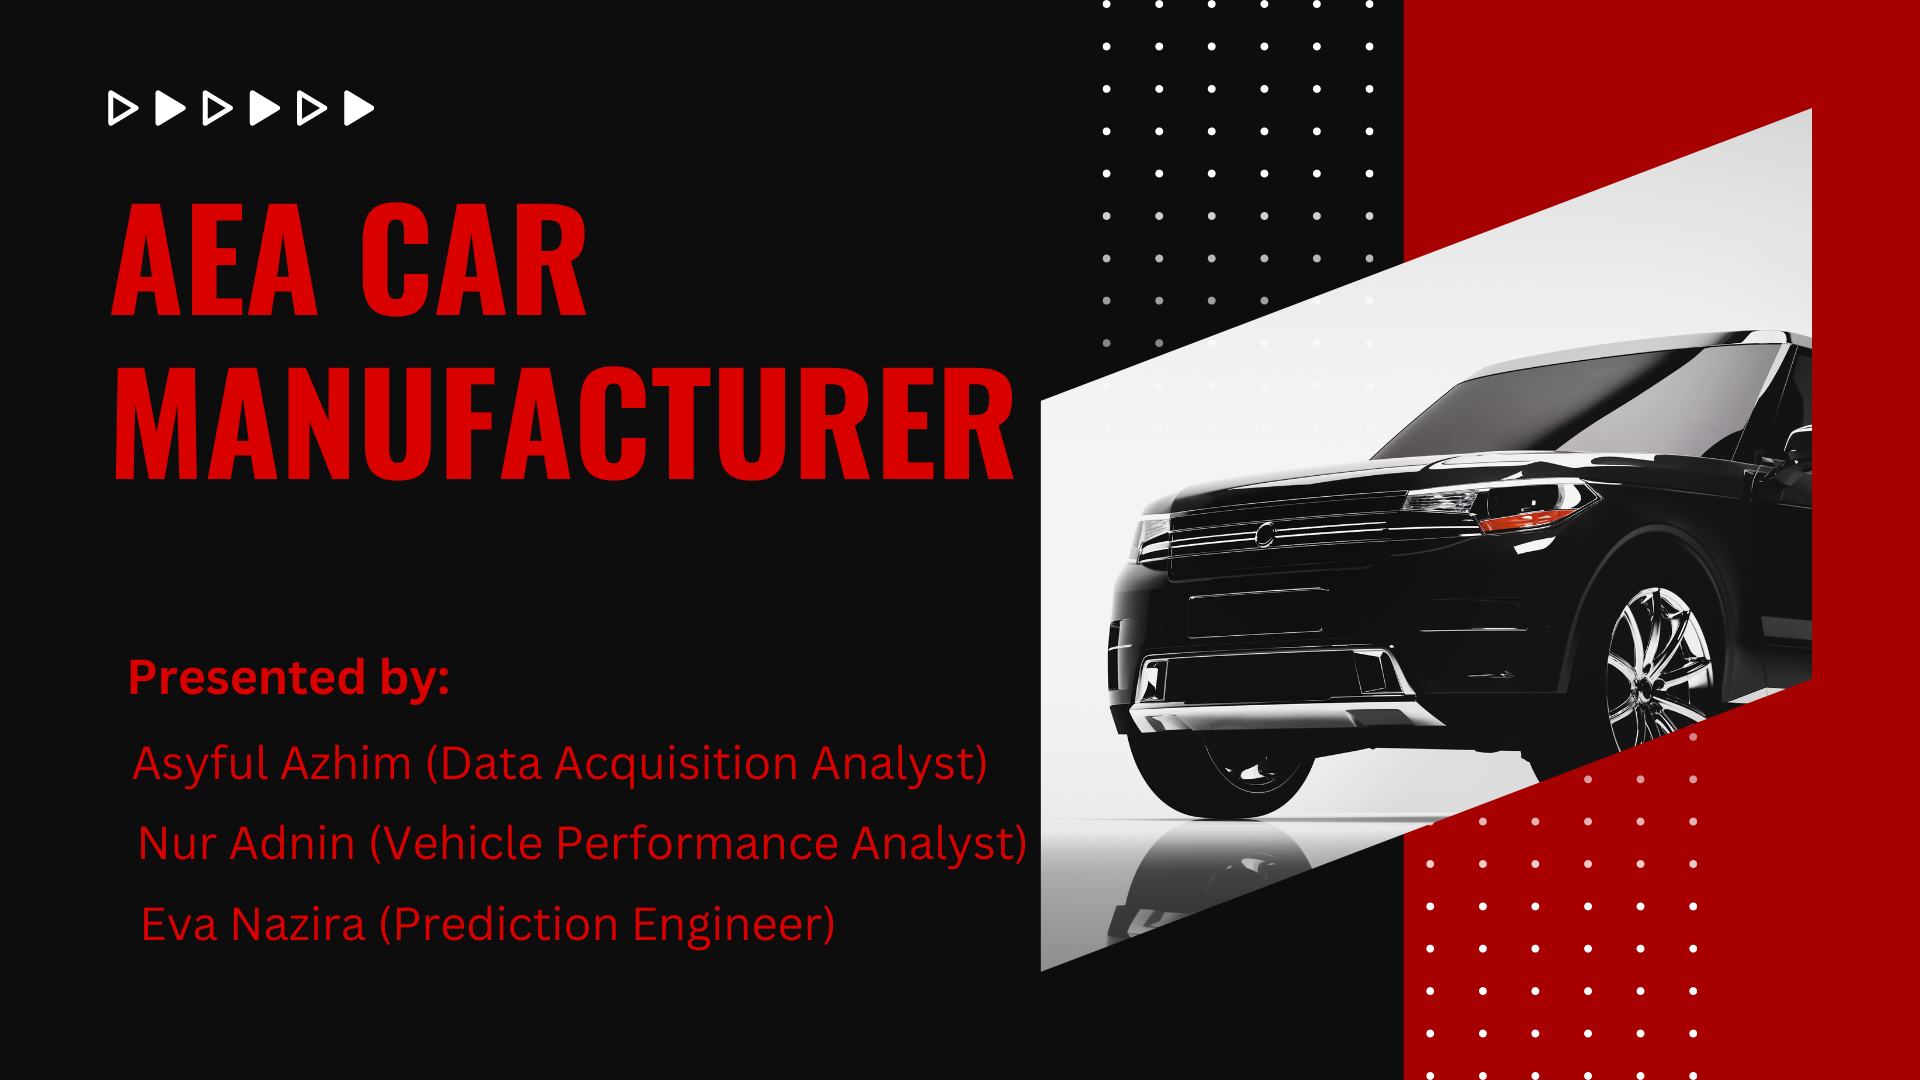

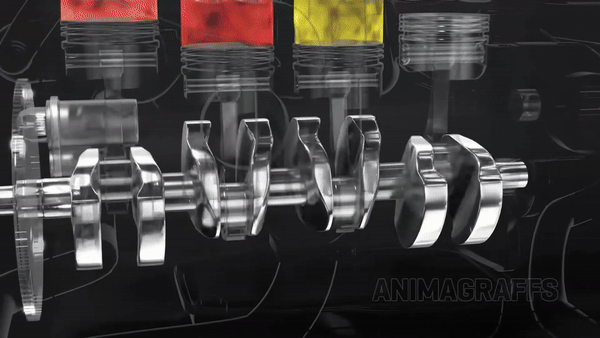

# Problem Statement

What are the most significant factors influencing fuel efficiency in vehicles, and how can they be optimized to reduce fuel consumption and minimize environmental impact?

# Data Explanation

1. **Engine Size**  Larger engine size = more power, but often lower fuel efficiency.

2. **Cylinders (L)**  More cylinders = more power, but often lower fuel efficiency.

3. **Smog Rating**  Higher rating = cleaner emissions, better for the environment.

4. **CO2 Rating**  Lower rating = fewer emissions, better for the environment.

5. **CO2 Emissions**  Measures the amount of CO2 produced while driving.

6. **Combined (mpg)** Represents overall fuel efficiency, higher is better.


**Transmission**

A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 - 10 = Number of gears

**Fuel Type**

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural Gas

# Step 1: Objectives

* **Engine Size, Cylinders and Class vs. Fuel Usage**
* **Engine Size, Cylinders and Class vs. Fuel Efficiency**
* **Engine Size, Cylinders and Class vs. CO2 Emmission**
* **Model Year vs Fuel Usage, Fuel Efficiency and CO2 Emmission**
* **Build Fuel Efficiency Predictive Model**
* **Develop a recommendation system**

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Data Collection
- **Collect and store data**: Gather the data from the identified sources and store it in a secure and accessible location.
- **Document data provenance**: Keep track of the data's origin, quality, and any transformations or cleaning that have been applied.

In [ ]:
# load the data
data1 = pd.read_csv('/content/my2005-2014-fuel-consumption-ratings-5-cycle.csv')
data1

NameError: name 'pd' is not defined

In [ ]:
# @title
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10561 entries, 0 to 10560
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            10561 non-null  int64  
 1   Make                  10561 non-null  object 
 2   Model                 10561 non-null  object 
 3   Vehicle class         10561 non-null  object 
 4   Engine size (L)       10561 non-null  float64
 5   Cylinders             10561 non-null  int64  
 6   Transmission          10561 non-null  object 
 7   Fuel type             10561 non-null  object 
 8   City (L/100 km)       10561 non-null  float64
 9   Highway (L/100 km)    10561 non-null  float64
 10  Combined (L/100 km)   10561 non-null  float64
 11  Combined (mpg)        10561 non-null  int64  
 12  CO2 emissions (g/km)  10561 non-null  int64  
 13  CO2 rating            0 non-null      float64
 14  Smog rating           0 non-null      float64
dtypes: float64(6), int6

In [ ]:
# @title
data2 = pd.read_csv('/content/my2015-2019-fuel-consumption-ratings.csv')
data2

Model year   Make        Model                    Vehicle class  \
0           2015  Acura          ILX                          Compact   
1           2015  Acura          ILX                          Compact   
2           2015  Acura   ILX Hybrid                          Compact   
3           2015  Acura   MDX SH-AWD     Sport utility vehicle: Small   
4           2015  Acura      RDX AWD     Sport utility vehicle: Small   
...          ...    ...          ...                              ...   
5426        2019  Volvo  XC40 T5 AWD     Sport utility vehicle: Small   
5427        2019  Volvo  XC60 T5 AWD     Sport utility vehicle: Small   
5428        2019  Volvo  XC60 T6 AWD     Sport utility vehicle: Small   
5429        2019  Volvo  XC90 T5 AWD  Sport utility vehicle: Standard   
5430        2019  Volvo  XC90 T6 AWD  Sport utility vehicle: Standard   

      Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0                 2.0          4          AS5         Z              9.7   
1                 2.4          4           M6         Z             10.8   
2                 1.5          4          AV7         Z              6.0   
3                 3.5          6          AS6         Z             12.7   
4                 3.5          6          AS6         Z             12.1   
...               ...        ...          ...       ...              ...   
5426              2.0          4          AS8         Z             10.3   
5427              2.0          4          AS8         Z             11.3   
5428              2.0          4          AS8         Z             11.8   
5429              2.0          4          AS8         Z             11.3   
5430              2.0          4          AS8         Z             12.1   

      Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                    6.7                  8.3              34   
1                    7.4                  9.3              30   
2                    6.1                  6.1              46   
3                    9.1                 11.1              25   
4                    8.7                 10.6              27   
...                  ...                  ...             ...   
5426                 7.5                  9.0              31   
5427                 8.5                 10.0              28   
5428                 8.6                 10.4              27   
5429                 8.5                 10.0              28   
5430                 8.9                 10.7              26   

      CO2 emissions (g/km)  CO2 rating  Smog rating  
0                      191         NaN          NaN  
1                      214         NaN          NaN  
2                      140         NaN          NaN  
3                      255         NaN          NaN  
4                      244         NaN          NaN  
...                    ...         ...          ...  
5426                   211         5.0          5.0  
5427                   233         5.0          5.0  
5428                   242         5.0          7.0  
5429                   233         5.0          5.0  
5430                   250         4.0          7.0  

[5431 rows x 15 columns]

In [ ]:
# @title
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5431 entries, 0 to 5430
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            5431 non-null   int64  
 1   Make                  5431 non-null   object 
 2   Model                 5431 non-null   object 
 3   Vehicle class         5431 non-null   object 
 4   Engine size (L)       5431 non-null   float64
 5   Cylinders             5431 non-null   int64  
 6   Transmission          5431 non-null   object 
 7   Fuel type             5431 non-null   object 
 8   City (L/100 km)       5431 non-null   float64
 9   Highway (L/100 km)    5431 non-null   float64
 10  Combined (L/100 km)   5431 non-null   float64
 11  Combined (mpg)        5431 non-null   int64  
 12  CO2 emissions (g/km)  5431 non-null   int64  
 13  CO2 rating            4303 non-null   float64
 14  Smog rating           3197 non-null   float64
dtypes: float64(6), int64(

In [ ]:
# @title
data2.dropna(axis=0, how='any', inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3197 entries, 2234 to 5430
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            3197 non-null   int64  
 1   Make                  3197 non-null   object 
 2   Model                 3197 non-null   object 
 3   Vehicle class         3197 non-null   object 
 4   Engine size (L)       3197 non-null   float64
 5   Cylinders             3197 non-null   int64  
 6   Transmission          3197 non-null   object 
 7   Fuel type             3197 non-null   object 
 8   City (L/100 km)       3197 non-null   float64
 9   Highway (L/100 km)    3197 non-null   float64
 10  Combined (L/100 km)   3197 non-null   float64
 11  Combined (mpg)        3197 non-null   int64  
 12  CO2 emissions (g/km)  3197 non-null   int64  
 13  CO2 rating            3197 non-null   float64
 14  Smog rating           3197 non-null   float64
dtypes: float64(6), int64(4)

In [ ]:
# @title
data3 = pd.read_csv('/content/my2020-fuel-consumption-ratings.csv')
data3

Model year   Make              Model                    Vehicle class  \
0          2020  Acura                ILX                          Compact   
1          2020  Acura         MDX SH-AWD     Sport utility vehicle: Small   
2          2020  Acura  MDX SH-AWD A-SPEC     Sport utility vehicle: Small   
3          2020  Acura     MDX Hybrid AWD     Sport utility vehicle: Small   
4          2020  Acura                NSX                       Two-seater   
..          ...    ...                ...                              ...   
970        2020  Volvo        XC40 T5 AWD     Sport utility vehicle: Small   
971        2020  Volvo        XC60 T5 AWD     Sport utility vehicle: Small   
972        2020  Volvo        XC60 T6 AWD     Sport utility vehicle: Small   
973        2020  Volvo        XC90 T5 AWD  Sport utility vehicle: Standard   
974        2020  Volvo        XC90 T6 AWD  Sport utility vehicle: Standard   

     Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0                2.4          4          AM8         Z              9.9   
1                3.5          6          AS9         Z             12.3   
2                3.5          6          AS9         Z             12.2   
3                3.0          6          AM7         Z              9.1   
4                3.5          6          AM9         Z             11.1   
..               ...        ...          ...       ...              ...   
970              2.0          4          AS8         Z             10.7   
971              2.0          4          AS8         Z             11.2   
972              2.0          4          AS8         Z             11.7   
973              2.0          4          AS8         Z             11.2   
974              2.0          4          AS8         Z             12.2   

     Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                   7.0                  8.6              33   
1                   9.2                 10.9              26   
2                   9.5                 11.0              26   
3                   9.0                  9.0              31   
4                  10.8                 11.0              26   
..                  ...                  ...             ...   
970                 7.7                  9.4              30   
971                 8.3                  9.9              29   
972                 8.6                 10.3              27   
973                 8.3                  9.9              29   
974                 8.7                 10.7              26   

     CO2 emissions (g/km)  CO2 rating  Smog rating  
0                     199           6            3  
1                     254           4            3  
2                     258           4            3  
3                     210           5            3  
4                     261           4            3  
..                    ...         ...          ...  
970                   219           5            5  
971                   232           5            5  
972                   240           5            7  
973                   232           5            5  
974                   248           4            7  

[975 rows x 15 columns]

In [ ]:
# @title
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            975 non-null    int64  
 1   Make                  975 non-null    object 
 2   Model                 975 non-null    object 
 3   Vehicle class         975 non-null    object 
 4   Engine size (L)       975 non-null    float64
 5   Cylinders             975 non-null    int64  
 6   Transmission          975 non-null    object 
 7   Fuel type             975 non-null    object 
 8   City (L/100 km)       975 non-null    float64
 9   Highway (L/100 km)    975 non-null    float64
 10  Combined (L/100 km)   975 non-null    float64
 11  Combined (mpg)        975 non-null    int64  
 12  CO2 emissions (g/km)  975 non-null    int64  
 13  CO2 rating            975 non-null    int64  
 14  Smog rating           975 non-null    int64  
dtypes: float64(4), int64(6)

In [ ]:
# @title
data4 = pd.read_csv('/content/my2021-fuel-consumption-ratings.csv')
data4

Model year   Make              Model                    Vehicle class  \
0          2021  Acura                ILX                          Compact   
1          2021  Acura                NSX                       Two-seater   
2          2021  Acura         RDX SH-AWD     Sport utility vehicle: Small   
3          2021  Acura  RDX SH-AWD A-SPEC     Sport utility vehicle: Small   
4          2021  Acura         TLX SH-AWD                          Compact   
..          ...    ...                ...                              ...   
965        2021  Volvo        XC40 T5 AWD     Sport utility vehicle: Small   
966        2021  Volvo        XC60 T5 AWD     Sport utility vehicle: Small   
967        2021  Volvo        XC60 T6 AWD     Sport utility vehicle: Small   
968        2021  Volvo        XC90 T5 AWD  Sport utility vehicle: Standard   
969        2021  Volvo        XC90 T6 AWD  Sport utility vehicle: Standard   

     Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0                2.4          4          AM8         Z              9.9   
1                3.5          6          AM9         Z             11.1   
2                2.0          4         AS10         Z             11.0   
3                2.0          4         AS10         Z             11.3   
4                2.0          4         AS10         Z             11.2   
..               ...        ...          ...       ...              ...   
965              2.0          4          AS8         Z             10.7   
966              2.0          4          AS8         Z             11.1   
967              2.0          4          AS8         Z             11.7   
968              2.0          4          AS8         Z             11.5   
969              2.0          4          AS8         Z             12.1   

     Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                   7.0                  8.6              33   
1                  10.8                 11.0              26   
2                   8.6                  9.9              29   
3                   9.1                 10.3              27   
4                   8.0                  9.8              29   
..                  ...                  ...             ...   
965                 7.7                  9.4              30   
966                 8.3                  9.9              29   
967                 8.6                 10.3              27   
968                 8.4                 10.1              28   
969                 8.5                 10.5              27   

     CO2 emissions (g/km)  CO2 rating  Smog rating  
0                     199           6            3  
1                     256           4            3  
2                     232           5            6  
3                     242           5            6  
4                     230           5            7  
..                    ...         ...          ...  
965                   219           5            5  
966                   230           5            5  
967                   240           5            7  
968                   236           5            5  
969                   245           5            7  

[970 rows x 15 columns]

In [ ]:
# @title
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            970 non-null    int64  
 1   Make                  970 non-null    object 
 2   Model                 970 non-null    object 
 3   Vehicle class         970 non-null    object 
 4   Engine size (L)       970 non-null    float64
 5   Cylinders             970 non-null    int64  
 6   Transmission          970 non-null    object 
 7   Fuel type             970 non-null    object 
 8   City (L/100 km)       970 non-null    float64
 9   Highway (L/100 km)    970 non-null    float64
 10  Combined (L/100 km)   970 non-null    float64
 11  Combined (mpg)        970 non-null    int64  
 12  CO2 emissions (g/km)  970 non-null    int64  
 13  CO2 rating            970 non-null    int64  
 14  Smog rating           970 non-null    int64  
dtypes: float64(4), int64(6)

In [ ]:
# @title
data5 = pd.read_csv('/content/my2022-fuel-consumption-ratings.csv')
data5

Model year   Make        Model                    Vehicle class  \
0          2022  Acura          ILX                          Compact   
1          2022  Acura   MDX SH-AWD     Sport utility vehicle: Small   
2          2022  Acura   MDX Type S  Sport utility vehicle: Standard   
3          2022  Acura          NSX                       Two-seater   
4          2022  Acura   RDX SH-AWD     Sport utility vehicle: Small   
..          ...    ...          ...                              ...   
971        2022  Volvo  XC40 T5 AWD     Sport utility vehicle: Small   
972        2022  Volvo  XC60 B5 AWD     Sport utility vehicle: Small   
973        2022  Volvo  XC60 B6 AWD     Sport utility vehicle: Small   
974        2022  Volvo  XC90 T5 AWD  Sport utility vehicle: Standard   
975        2022  Volvo  XC90 T6 AWD  Sport utility vehicle: Standard   

     Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0                2.4          4          AM8         Z              9.9   
1                3.5          6         AS10         Z             12.6   
2                3.0          6         AS10         Z             13.8   
3                3.5          6          AM9         Z             11.1   
4                2.0          4         AS10         Z             11.0   
..               ...        ...          ...       ...              ...   
971              2.0          4          AS8         Z             10.7   
972              2.0          4          AS8         Z             10.5   
973              2.0          4          AS8         Z             11.0   
974              2.0          4          AS8         Z             11.5   
975              2.0          4          AS8         Z             12.4   

     Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                   7.0                  8.6              33   
1                   9.4                 11.2              25   
2                  11.2                 12.4              23   
3                  10.8                 11.0              26   
4                   8.6                  9.9              29   
..                  ...                  ...             ...   
971                 7.7                  9.4              30   
972                 8.1                  9.4              30   
973                 8.7                  9.9              29   
974                 8.4                 10.1              28   
975                 8.9                 10.8              26   

     CO2 emissions (g/km)  CO2 rating  Smog rating  
0                     200           6            3  
1                     263           4            5  
2                     291           4            5  
3                     256           5            3  
4                     232           5            6  
..                    ...         ...          ...  
971                   219           5            5  
972                   219           5            5  
973                   232           5            7  
974                   236           5            5  
975                   252           5            7  

[976 rows x 15 columns]

In [ ]:
# @title
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            976 non-null    int64  
 1   Make                  976 non-null    object 
 2   Model                 976 non-null    object 
 3   Vehicle class         976 non-null    object 
 4   Engine size (L)       976 non-null    float64
 5   Cylinders             976 non-null    int64  
 6   Transmission          976 non-null    object 
 7   Fuel type             976 non-null    object 
 8   City (L/100 km)       976 non-null    float64
 9   Highway (L/100 km)    976 non-null    float64
 10  Combined (L/100 km)   976 non-null    float64
 11  Combined (mpg)        976 non-null    int64  
 12  CO2 emissions (g/km)  976 non-null    int64  
 13  CO2 rating            976 non-null    int64  
 14  Smog rating           976 non-null    int64  
dtypes: float64(4), int64(6)

In [ ]:
# @title
import pandas as pd

# Try reading the file with Latin-1 encoding
data6 = pd.read_csv('/content/my2023-fuel-consumption-ratings.csv', encoding='latin-1')
data6

Model year   Make              Model                    Vehicle class  \
0          2023  Acura            Integra                        Full-size   
1          2023  Acura     Integra A-SPEC                        Full-size   
2          2023  Acura     Integra A-SPEC                        Full-size   
3          2023  Acura         MDX SH-AWD     Sport utility vehicle: Small   
4          2023  Acura  MDX SH-AWD Type S  Sport utility vehicle: Standard   
..          ...    ...                ...                              ...   
828        2023  Volvo        XC40 B5 AWD     Sport utility vehicle: Small   
829        2023  Volvo        XC60 B5 AWD     Sport utility vehicle: Small   
830        2023  Volvo        XC60 B6 AWD     Sport utility vehicle: Small   
831        2023  Volvo        XC90 B5 AWD  Sport utility vehicle: Standard   
832        2023  Volvo        XC90 B6 AWD  Sport utility vehicle: Standard   

     Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0                1.5          4          AV7         Z              7.9   
1                1.5          4          AV7         Z              8.1   
2                1.5          4           M6         Z              8.9   
3                3.5          6         AS10         Z             12.6   
4                3.0          6         AS10         Z             13.8   
..               ...        ...          ...       ...              ...   
828              2.0          4          AS8         Z             10.2   
829              2.0          4          AS8         Z             10.3   
830              2.0          4          AS8         Z             11.1   
831              2.0          4          AS8         Z             10.5   
832              2.0          4          AS8         Z             11.9   

     Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                   6.3                  7.2              39   
1                   6.5                  7.4              38   
2                   6.5                  7.8              36   
3                   9.4                 11.2              25   
4                  11.2                 12.4              23   
..                  ...                  ...             ...   
828                 7.9                  9.2              31   
829                 8.2                  9.4              30   
830                 8.7                 10.0              28   
831                 8.4                  9.6              29   
832                 9.1                 10.6              27   

     CO2 emissions (g/km)  CO2 rating  Smog rating  
0                     167           6            7  
1                     172           6            7  
2                     181           6            6  
3                     263           4            5  
4                     291           4            5  
..                    ...         ...          ...  
828                   215           5            5  
829                   218           5            5  
830                   233           5            7  
831                   223           5            5  
832                   249           5            7  

[833 rows x 15 columns]

In [ ]:
# @title
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            833 non-null    int64  
 1   Make                  833 non-null    object 
 2   Model                 833 non-null    object 
 3   Vehicle class         833 non-null    object 
 4   Engine size (L)       833 non-null    float64
 5   Cylinders             833 non-null    int64  
 6   Transmission          833 non-null    object 
 7   Fuel type             833 non-null    object 
 8   City (L/100 km)       833 non-null    float64
 9   Highway (L/100 km)    833 non-null    float64
 10  Combined (L/100 km)   833 non-null    float64
 11  Combined (mpg)        833 non-null    int64  
 12  CO2 emissions (g/km)  833 non-null    int64  
 13  CO2 rating            833 non-null    int64  
 14  Smog rating           833 non-null    int64  
dtypes: float64(4), int64(6)

In [ ]:
# @title
data7 = pd.read_csv('/content/my2024-fuel-consumption-ratings.csv', encoding='latin-1')
data7

Model year   Make              Model                    Vehicle class  \
0          2024  Acura     Integra A-SPEC                        Full-size   
1          2024  Acura     Integra A-SPEC                        Full-size   
2          2024  Acura     Integra Type S                        Full-size   
3          2024  Acura         MDX SH-AWD     Sport utility vehicle: Small   
4          2024  Acura  MDX SH-AWD Type S  Sport utility vehicle: Standard   
..          ...    ...                ...                              ...   
759        2024  Volvo      V60 CC B5 AWD             Station wagon: Small   
760        2024  Volvo      V90 CC B6 AWD          Station wagon: Mid-size   
761        2024  Volvo        XC40 B5 AWD     Sport utility vehicle: Small   
762        2024  Volvo        XC60 B5 AWD     Sport utility vehicle: Small   
763        2024  Volvo        XC90 B6 AWD  Sport utility vehicle: Standard   

     Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0                1.5          4          AV7         Z              8.1   
1                1.5          4           M6         Z              8.9   
2                2.0          4           M6         Z             11.1   
3                3.5          6         AS10         Z             12.6   
4                3.0          6         AS10         Z             13.8   
..               ...        ...          ...       ...              ...   
759              2.0          4          AS8         Z             10.0   
760              2.0          4          AS8         Z             10.7   
761              2.0          4          AS8         Z              9.9   
762              2.0          4          AS8         Z             10.6   
763              2.0          4          AS8         Z             10.9   

     Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                   6.5                  7.4              38   
1                   6.5                  7.8              36   
2                   8.3                  9.9              29   
3                   9.4                 11.2              25   
4                  11.2                 12.4              23   
..                  ...                  ...             ...   
759                 7.5                  8.9              32   
760                 8.1                  9.5              30   
761                 7.8                  9.0              31   
762                 8.3                  9.6              29   
763                 8.6                  9.8              29   

     CO2 emissions (g/km)  CO2 rating  Smog rating  
0                     172           6            7  
1                     181           6            6  
2                     230           5            6  
3                     263           4            5  
4                     291           4            5  
..                    ...         ...          ...  
759                   207           5            5  
760                   223           5            7  
761                   210           5            5  
762                   226           5            5  
763                   230           5            7  

[764 rows x 15 columns]

In [ ]:
# @title
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            764 non-null    int64  
 1   Make                  764 non-null    object 
 2   Model                 764 non-null    object 
 3   Vehicle class         764 non-null    object 
 4   Engine size (L)       764 non-null    float64
 5   Cylinders             764 non-null    int64  
 6   Transmission          764 non-null    object 
 7   Fuel type             764 non-null    object 
 8   City (L/100 km)       764 non-null    float64
 9   Highway (L/100 km)    764 non-null    float64
 10  Combined (L/100 km)   764 non-null    float64
 11  Combined (mpg)        764 non-null    int64  
 12  CO2 emissions (g/km)  764 non-null    int64  
 13  CO2 rating            764 non-null    int64  
 14  Smog rating           764 non-null    int64  
dtypes: float64(4), int64(6)

## Combine All Data

In [ ]:
# @title
import pandas as pd
fuel = pd.concat([data1, data2, data3, data4, data5, data6, data7], ignore_index=True)
fuel

Model year   Make          Model                    Vehicle class  \
0            2005  Acura          1.7EL                          Compact   
1            2005  Acura          1.7EL                          Compact   
2            2005  Acura        MDX AWD            Sport utility vehicle   
3            2005  Acura            NSX                       Two-seater   
4            2005  Acura            NSX                       Two-seater   
...           ...    ...            ...                              ...   
18271        2024  Volvo  V60 CC B5 AWD             Station wagon: Small   
18272        2024  Volvo  V90 CC B6 AWD          Station wagon: Mid-size   
18273        2024  Volvo    XC40 B5 AWD     Sport utility vehicle: Small   
18274        2024  Volvo    XC60 B5 AWD     Sport utility vehicle: Small   
18275        2024  Volvo    XC90 B6 AWD  Sport utility vehicle: Standard   

       Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0                  1.7          4           A4         X              9.2   
1                  1.7          4           M5         X              9.1   
2                  3.5          6           A5         Z             15.9   
3                  3.0          6          AS4         Z             15.1   
4                  3.2          6           M6         Z             15.1   
...                ...        ...          ...       ...              ...   
18271              2.0          4          AS8         Z             10.0   
18272              2.0          4          AS8         Z             10.7   
18273              2.0          4          AS8         Z              9.9   
18274              2.0          4          AS8         Z             10.6   
18275              2.0          4          AS8         Z             10.9   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                     7.2                  8.3              34   
1                     7.3                  8.3              34   
2                    11.1                 13.7              21   
3                    10.5                 13.0              22   
4                    10.5                 13.0              22   
...                   ...                  ...             ...   
18271                 7.5                  8.9              32   
18272                 8.1                  9.5              30   
18273                 7.8                  9.0              31   
18274                 8.3                  9.6              29   
18275                 8.6                  9.8              29   

       CO2 emissions (g/km)  CO2 rating  Smog rating  
0                       191         NaN          NaN  
1                       191         NaN          NaN  
2                       315         NaN          NaN  
3                       299         NaN          NaN  
4                       299         NaN          NaN  
...                     ...         ...          ...  
18271                   207         5.0          5.0  
18272                   223         5.0          7.0  
18273                   210         5.0          5.0  
18274                   226         5.0          5.0  
18275                   230         5.0          7.0  

[18276 rows x 15 columns]

In [ ]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18276 entries, 0 to 18275
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            18276 non-null  int64  
 1   Make                  18276 non-null  object 
 2   Model                 18276 non-null  object 
 3   Vehicle class         18276 non-null  object 
 4   Engine size (L)       18276 non-null  float64
 5   Cylinders             18276 non-null  int64  
 6   Transmission          18276 non-null  object 
 7   Fuel type             18276 non-null  object 
 8   City (L/100 km)       18276 non-null  float64
 9   Highway (L/100 km)    18276 non-null  float64
 10  Combined (L/100 km)   18276 non-null  float64
 11  Combined (mpg)        18276 non-null  int64  
 12  CO2 emissions (g/km)  18276 non-null  int64  
 13  CO2 rating            7715 non-null   float64
 14  Smog rating           7715 non-null   float64
dtypes: float64(6), int6

In [ ]:
fuel.describe()

Model year  Engine size (L)     Cylinders  City (L/100 km)  \
count  18276.000000     18276.000000  18276.000000     18276.000000   
mean    2014.085467         3.362711      5.857846        13.544999   
std        5.897513         1.353376      1.876993         3.803442   
min     2005.000000         0.800000      2.000000         4.000000   
25%     2009.000000         2.300000      4.000000        10.900000   
50%     2013.000000         3.000000      6.000000        13.100000   
75%     2019.000000         4.200000      8.000000        15.600000   
max     2024.000000         8.400000     16.000000        30.400000   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
count        18276.000000         18276.000000    18276.000000   
mean             9.815299            11.866601       25.518439   
std              2.541587             3.198140        6.996950   
min              3.900000             4.000000       11.000000   
25%              8.100000             9.700000       21.000000   
50%              9.400000            11.400000       25.000000   
75%             11.100000            13.600000       29.000000   
max             22.100000            26.100000       71.000000   

       CO2 emissions (g/km)   CO2 rating  Smog rating  
count          18276.000000  7715.000000  7715.000000  
mean             269.139856     4.543098     4.824887  
std               63.796615     1.569429     1.785794  
min               94.000000     1.000000     1.000000  
25%              224.000000     3.000000     3.000000  
50%              263.000000     4.000000     5.000000  
75%              308.000000     5.000000     6.000000  
max              608.000000    10.000000     8.000000

# Step 3: Data Cleaning

- **Check for errors**: Identify and correct errors in the data, such as missing values, outliers, or inconsistencies.
- **Handle missing values**: Decide how to handle missing values, such as imputing them with mean or median values, or removing them from the analysis.
- **Transform data**: Transform the data into a suitable format for analysis, such as converting categorical variables into numerical variables.

## 3.1 Handle missing values
Remove them from analysis

In [ ]:
fuel.head()

Model year   Make    Model          Vehicle class  Engine size (L)  \
0        2005  Acura    1.7EL                Compact              1.7   
1        2005  Acura    1.7EL                Compact              1.7   
2        2005  Acura  MDX AWD  Sport utility vehicle              3.5   
3        2005  Acura      NSX             Two-seater              3.0   
4        2005  Acura      NSX             Two-seater              3.2   

   Cylinders Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0          4           A4         X              9.2                 7.2   
1          4           M5         X              9.1                 7.3   
2          6           A5         Z             15.9                11.1   
3          6          AS4         Z             15.1                10.5   
4          6           M6         Z             15.1                10.5   

   Combined (L/100 km)  Combined (mpg)  CO2 emissions (g/km)  CO2 rating  \
0                  8.3              34                   191         NaN   
1                  8.3              34                   191         NaN   
2                 13.7              21                   315         NaN   
3                 13.0              22                   299         NaN   
4                 13.0              22                   299         NaN   

   Smog rating  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [ ]:
fuel.dropna(axis=1, how='any', inplace=True)
# axis = 1 , for column, 0 - for row
# how ='any' , any column contain no value will be drop
fuel.head()
# fuel.head() - display first 5 by default

Model year   Make    Model          Vehicle class  Engine size (L)  \
0        2005  Acura    1.7EL                Compact              1.7   
1        2005  Acura    1.7EL                Compact              1.7   
2        2005  Acura  MDX AWD  Sport utility vehicle              3.5   
3        2005  Acura      NSX             Two-seater              3.0   
4        2005  Acura      NSX             Two-seater              3.2   

   Cylinders Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0          4           A4         X              9.2                 7.2   
1          4           M5         X              9.1                 7.3   
2          6           A5         Z             15.9                11.1   
3          6          AS4         Z             15.1                10.5   
4          6           M6         Z             15.1                10.5   

   Combined (L/100 km)  Combined (mpg)  CO2 emissions (g/km)  
0                  8.3              34                   191  
1                  8.3              34                   191  
2                 13.7              21                   315  
3                 13.0              22                   299  
4                 13.0              22                   299

## 3.2 Transform Data

In [ ]:
# @title
# Convert 'Combined_mpg' to km per litre
fuel['Fuel efficiency (km/L)'] = fuel['Combined (mpg)'] * 0.425144

# Drop the original 'Combined_mpg' column
fuel.drop('Combined (mpg)', axis=1, inplace=True)
fuel.head()

Model year   Make    Model          Vehicle class  Engine size (L)  \
0        2005  Acura    1.7EL                Compact              1.7   
1        2005  Acura    1.7EL                Compact              1.7   
2        2005  Acura  MDX AWD  Sport utility vehicle              3.5   
3        2005  Acura      NSX             Two-seater              3.0   
4        2005  Acura      NSX             Two-seater              3.2   

   Cylinders Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0          4           A4         X              9.2                 7.2   
1          4           M5         X              9.1                 7.3   
2          6           A5         Z             15.9                11.1   
3          6          AS4         Z             15.1                10.5   
4          6           M6         Z             15.1                10.5   

   Combined (L/100 km)  CO2 emissions (g/km)  Fuel efficiency (km/L)  
0                  8.3                   191               14.454896  
1                  8.3                   191               14.454896  
2                 13.7                   315                8.928024  
3                 13.0                   299                9.353168  
4                 13.0                   299                9.353168

In [ ]:
# @title
#Arrange colums
fuel = fuel[['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)','Fuel efficiency (km/L)', 'CO2 emissions (g/km)']]
fuel.head()

Model year   Make    Model          Vehicle class  Engine size (L)  \
0        2005  Acura    1.7EL                Compact              1.7   
1        2005  Acura    1.7EL                Compact              1.7   
2        2005  Acura  MDX AWD  Sport utility vehicle              3.5   
3        2005  Acura      NSX             Two-seater              3.0   
4        2005  Acura      NSX             Two-seater              3.2   

   Cylinders Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0          4           A4         X              9.2                 7.2   
1          4           M5         X              9.1                 7.3   
2          6           A5         Z             15.9                11.1   
3          6          AS4         Z             15.1                10.5   
4          6           M6         Z             15.1                10.5   

   Combined (L/100 km)  Fuel efficiency (km/L)  CO2 emissions (g/km)  
0                  8.3               14.454896                   191  
1                  8.3               14.454896                   191  
2                 13.7                8.928024                   315  
3                 13.0                9.353168                   299  
4                 13.0                9.353168                   299

In [ ]:
# @title
# Rename column name to make it understandable
fuel.columns = ['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Avg Fuel usage (L/100 km)','Fuel efficiency (km/L)', 'CO2 emissions (g/km)']

fuel.head(10)

Model year   Make    Model          Vehicle class  Engine size (L)  \
0        2005  Acura    1.7EL                Compact              1.7   
1        2005  Acura    1.7EL                Compact              1.7   
2        2005  Acura  MDX AWD  Sport utility vehicle              3.5   
3        2005  Acura      NSX             Two-seater              3.0   
4        2005  Acura      NSX             Two-seater              3.2   
5        2005  Acura       RL               Mid-size              3.5   
6        2005  Acura      RSX             Subcompact              2.0   
7        2005  Acura      RSX             Subcompact              2.0   
8        2005  Acura      RSX             Subcompact              2.0   
9        2005  Acura       TL               Mid-size              3.2   

   Cylinders Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0          4           A4         X              9.2                 7.2   
1          4           M5         X              9.1                 7.3   
2          6           A5         Z             15.9                11.1   
3          6          AS4         Z             15.1                10.5   
4          6           M6         Z             15.1                10.5   
5          6          AS5         Z             14.5                 9.9   
6          4          AS5         X             10.6                 7.6   
7          4           M5         X              9.9                 7.6   
8          4           M6         Z             11.8                 8.3   
9          6          AS5         Z             13.3                 8.9   

   Avg Fuel usage (L/100 km)  Fuel efficiency (km/L)  CO2 emissions (g/km)  
0                        8.3               14.454896                   191  
1                        8.3               14.454896                   191  
2                       13.7                8.928024                   315  
3                       13.0                9.353168                   299  
4                       13.0                9.353168                   299  
5                       12.4                9.778312                   285  
6                        9.3               12.754320                   214  
7                        8.9               13.604608                   205  
8                       10.2               11.904032                   235  
9                       11.3               10.628600                   260

# Step 4: Data Analysis
- **Explore the data**: Use statistical and visual methods to understand the distribution of the data, identify patterns and relationships, and summarize the key characteristics.
- **Identify correlations**: Identify correlations between variables, including the relationships between the marketing channels and sales.
- **Develop hypotheses**: Based on the analysis, develop hypotheses about which marketing channels are most effective.

Import necessary libraries

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## 4.1 Exploratory Data Analysis (EDA)

In [ ]:
# @title
fuel.describe()  # Summary statistics

Model year  Engine size (L)     Cylinders  City (L/100 km)  \
count  18276.000000     18276.000000  18276.000000     18276.000000   
mean    2014.085467         3.362711      5.857846        13.544999   
std        5.897513         1.353376      1.876993         3.803442   
min     2005.000000         0.800000      2.000000         4.000000   
25%     2009.000000         2.300000      4.000000        10.900000   
50%     2013.000000         3.000000      6.000000        13.100000   
75%     2019.000000         4.200000      8.000000        15.600000   
max     2024.000000         8.400000     16.000000        30.400000   

       Highway (L/100 km)  Avg Fuel usage (L/100 km)  Fuel efficiency (km/L)  \
count        18276.000000               18276.000000            18276.000000   
mean             9.815299                  11.866601               10.849011   
std              2.541587                   3.198140                2.974711   
min              3.900000                   4.000000                4.676584   
25%              8.100000                   9.700000                8.928024   
50%              9.400000                  11.400000               10.628600   
75%             11.100000                  13.600000               12.329176   
max             22.100000                  26.100000               30.185224   

       CO2 emissions (g/km)  
count          18276.000000  
mean             269.139856  
std               63.796615  
min               94.000000  
25%              224.000000  
50%              263.000000  
75%              308.000000  
max              608.000000

In [ ]:
# @title
fuel.info() # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18276 entries, 0 to 18275
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Model year                 18276 non-null  int64  
 1   Make                       18276 non-null  object 
 2   Model                      18276 non-null  object 
 3   Vehicle class              18276 non-null  object 
 4   Engine size (L)            18276 non-null  float64
 5   Cylinders                  18276 non-null  int64  
 6   Transmission               18276 non-null  object 
 7   Fuel type                  18276 non-null  object 
 8   City (L/100 km)            18276 non-null  float64
 9   Highway (L/100 km)         18276 non-null  float64
 10  Avg Fuel usage (L/100 km)  18276 non-null  float64
 11  Fuel efficiency (km/L)     18276 non-null  float64
 12  CO2 emissions (g/km)       18276 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usag

In [ ]:
# @title
#fuel.corr()  # Correlation matrix
numerical_cols = fuel.select_dtypes(include=[np.number]).columns
correlations = fuel[numerical_cols].corr()
correlations

Model year  Engine size (L)  Cylinders  \
Model year                   1.000000        -0.129852  -0.103150   
Engine size (L)             -0.129852         1.000000   0.915044   
Cylinders                   -0.103150         0.915044   1.000000   
City (L/100 km)             -0.257851         0.820199   0.795519   
Highway (L/100 km)          -0.218473         0.761752   0.711936   
Avg Fuel usage (L/100 km)   -0.246800         0.808835   0.774781   
Fuel efficiency (km/L)       0.255957        -0.758189  -0.717571   
CO2 emissions (g/km)        -0.218389         0.834824   0.819033   

                           City (L/100 km)  Highway (L/100 km)  \
Model year                       -0.257851           -0.218473   
Engine size (L)                   0.820199            0.761752   
Cylinders                         0.795519            0.711936   
City (L/100 km)                   1.000000            0.949152   
Highway (L/100 km)                0.949152            1.000000   
Avg Fuel usage (L/100 km)         0.993548            0.978527   
Fuel efficiency (km/L)           -0.920397           -0.881758   
CO2 emissions (g/km)              0.920351            0.886998   

                           Avg Fuel usage (L/100 km)  Fuel efficiency (km/L)  \
Model year                                 -0.246800                0.255957   
Engine size (L)                             0.808835               -0.758189   
Cylinders                                   0.774781               -0.717571   
City (L/100 km)                             0.993548               -0.920397   
Highway (L/100 km)                          0.978527               -0.881758   
Avg Fuel usage (L/100 km)                   1.000000               -0.917475   
Fuel efficiency (km/L)                     -0.917475                1.000000   
CO2 emissions (g/km)                        0.919261               -0.903767   

                           CO2 emissions (g/km)  
Model year                            -0.218389  
Engine size (L)                        0.834824  
Cylinders                              0.819033  
City (L/100 km)                        0.920351  
Highway (L/100 km)                     0.886998  
Avg Fuel usage (L/100 km)              0.919261  
Fuel efficiency (km/L)                -0.903767  
CO2 emissions (g/km)                   1.000000

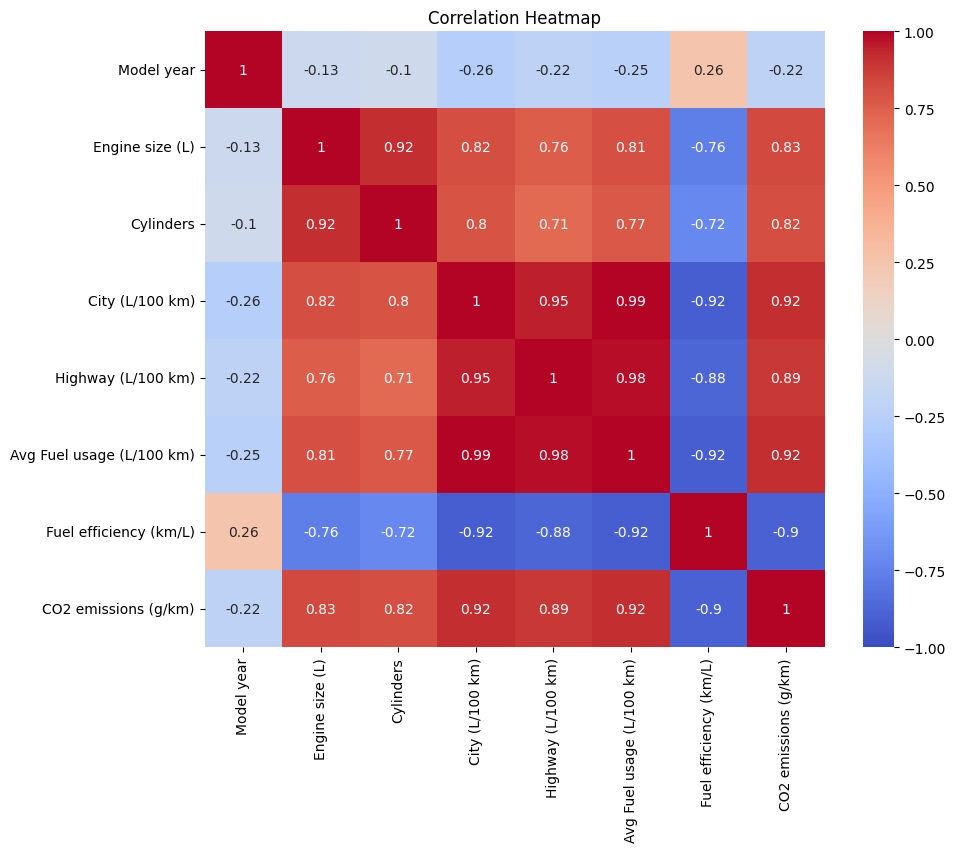

In [ ]:
# @title
#Correlogram graph based on correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

This heatmap shows that there are strong relationship between all variables especially engine size, cylinders and Co2 emissions. Between engine size and cylinders, they have strong positive correlation (0.92) indicates positive  relationship meanwhile between fuel efficiency (km/L) and co2 emissions (g/km), they have strong correlation but in negative(-0.9) indicate inverse relationship. There are weak correlation between variables where can be seen when the values are close to 0. For example between CO2 emissions and model year with (-0.22)







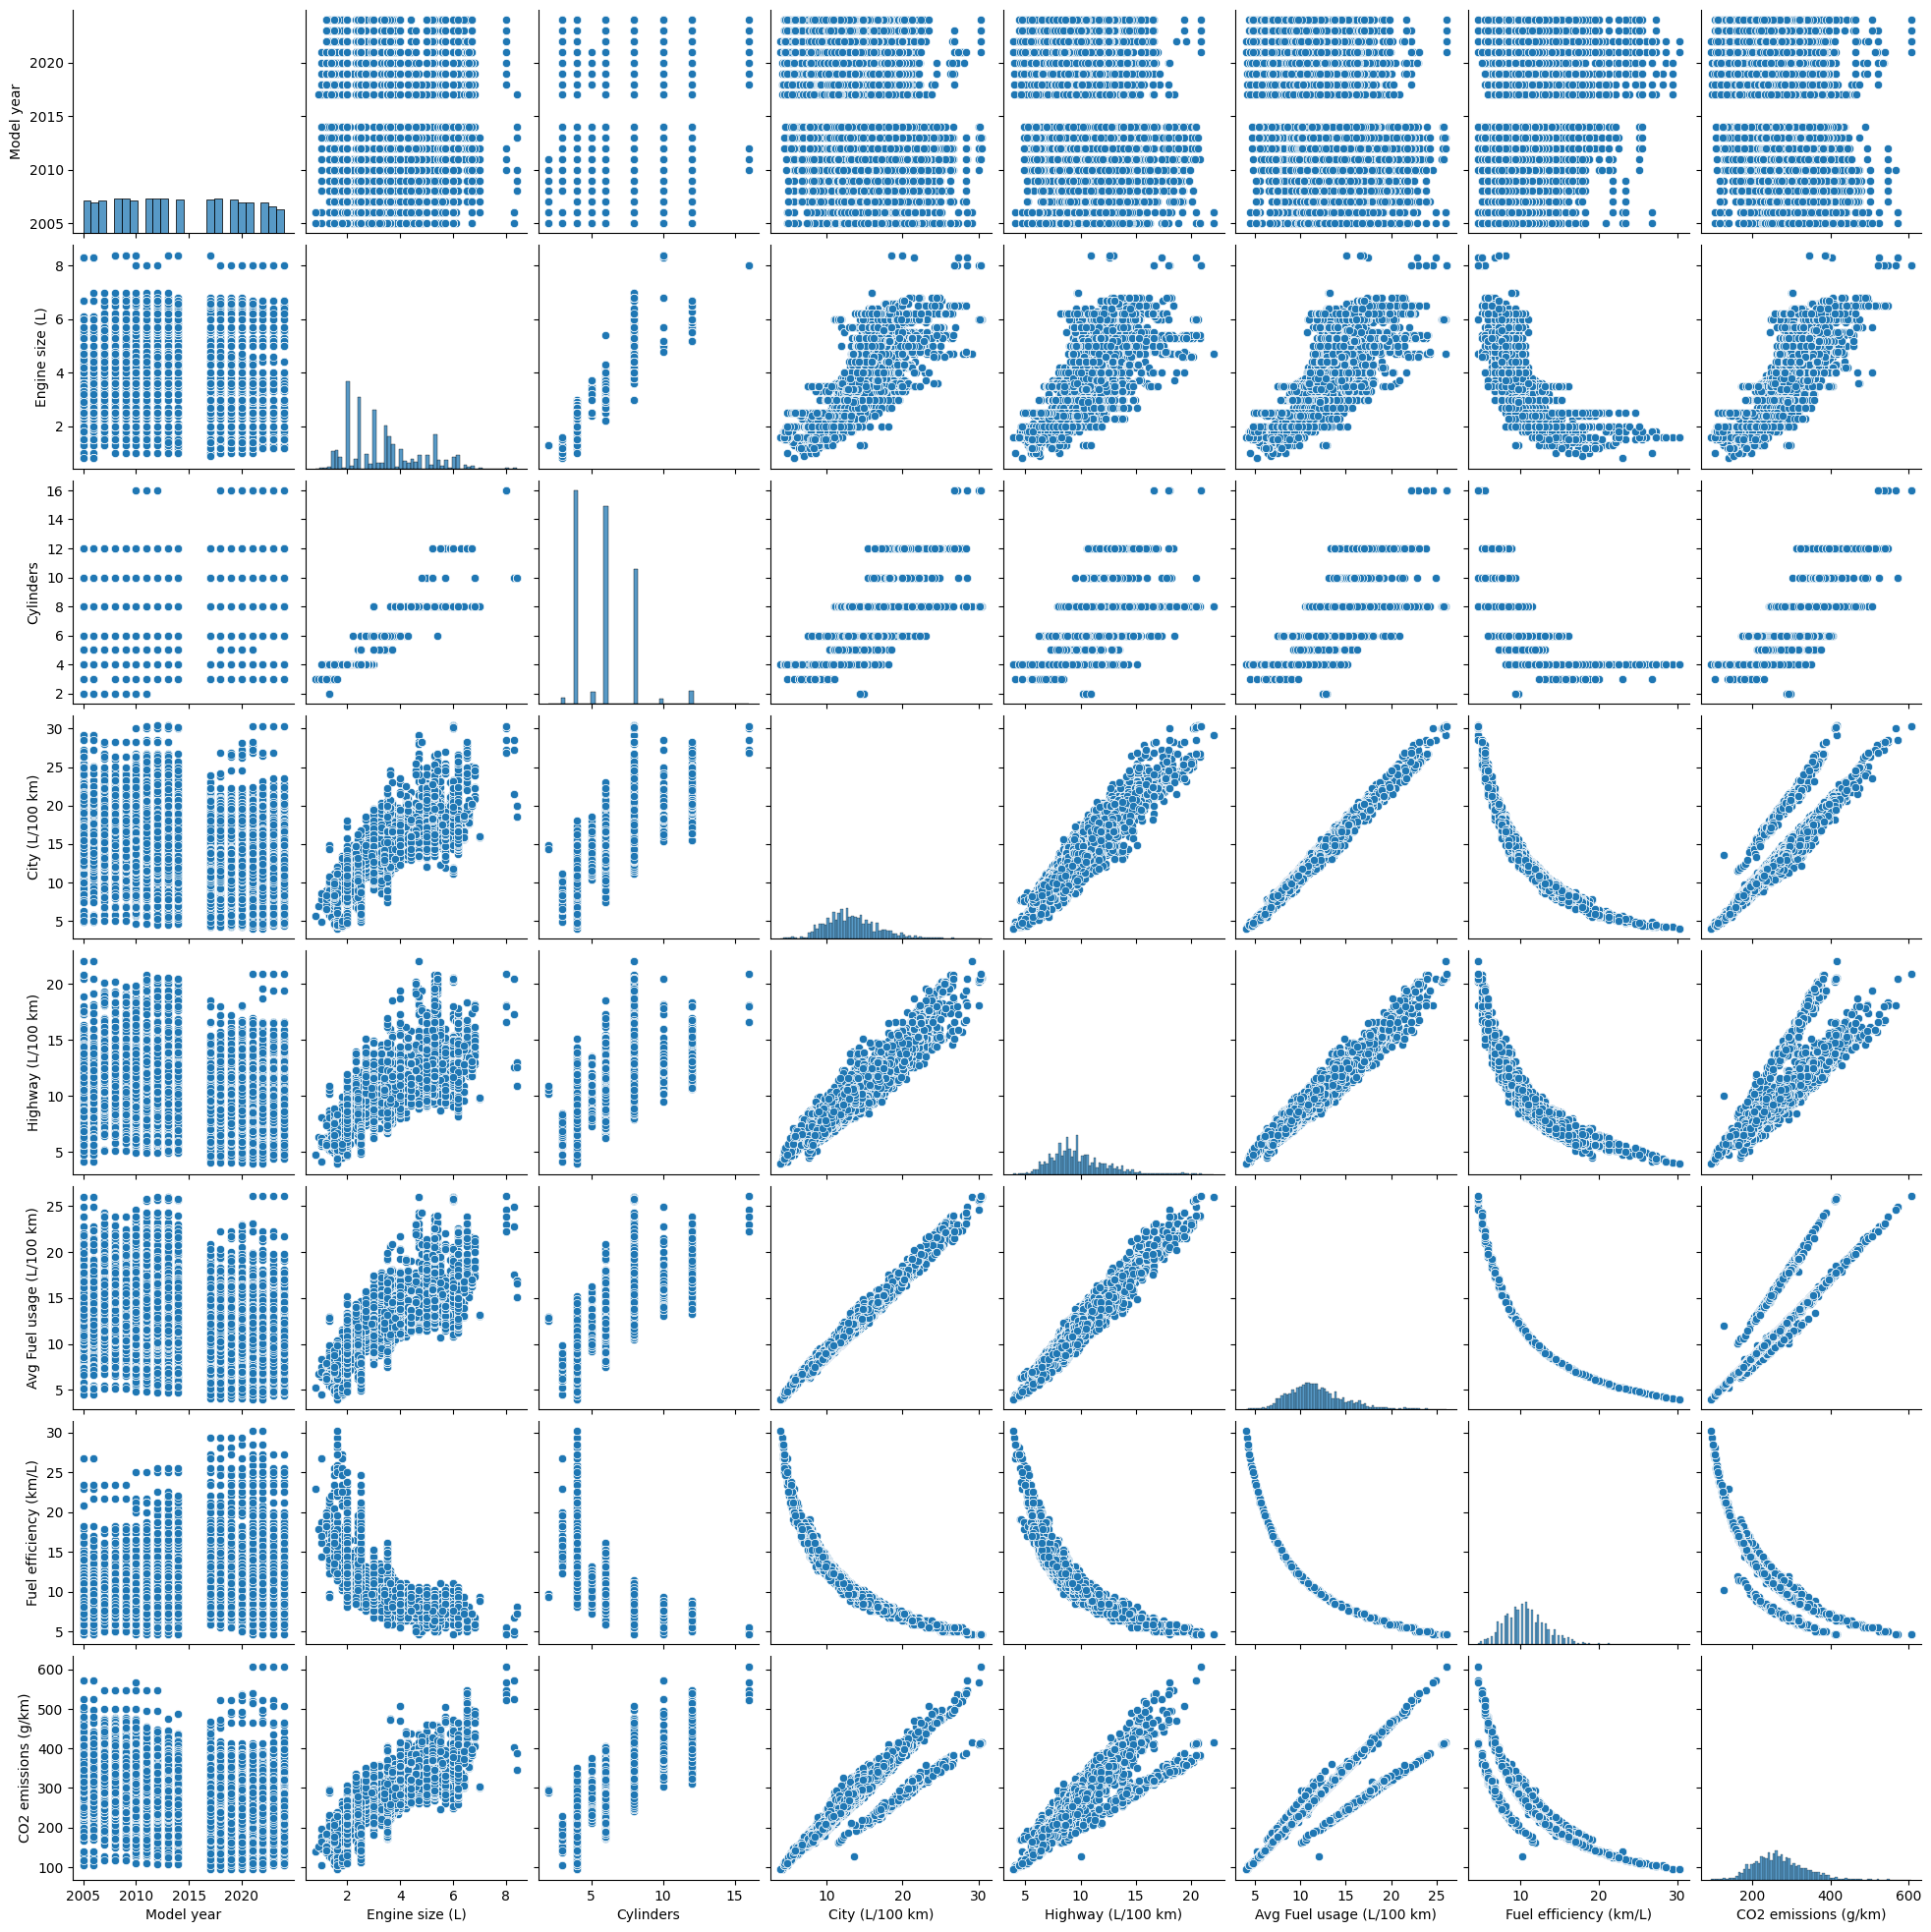

In [ ]:
# @title
#pairplot
sns.pairplot(fuel, vars=numerical_cols)

The plot summarize that there are correlations between engine size, number of cylinders, fuel usage, and CO2 emissions. For example, fuel efficiency is inversely related to engine size, number of cylinders, fuel usage, and CO2 emissions as shown on the graph above.Newer car models tend to have more consistent fuel efficiency and CO2 emission profiles, reflecting advancements in automotive technology.






Find Outlier

In [ ]:
# Calculate IQR for 'Avg Fuel usage (L/100 km)'
q1 = fuel['Avg Fuel usage (L/100 km)'].quantile(0.25)
q3 = fuel['Avg Fuel usage (L/100 km)'].quantile(0.75)

iqr = q3 - q1
iqr

3.9000000000000004

In [ ]:
iqrmin = q1 - 1.5 * iqr
iqrmin

3.8499999999999988

In [ ]:
iqrmax = q3 + 1.5 * iqr
iqrmax

19.45

In [ ]:
# @title
minoutlier = fuel[fuel['Avg Fuel usage (L/100 km)'] < iqrmin]
minoutlier

Empty DataFrame
Columns: [Model year, Make, Model, Vehicle class, Engine size (L), Cylinders, Transmission, Fuel type, City (L/100 km), Highway (L/100 km), Avg Fuel usage (L/100 km), Fuel efficiency (km/L), CO2 emissions (g/km)]
Index: []

In [ ]:
# @title
maxoutlier = fuel[fuel['Avg Fuel usage (L/100 km)'] > iqrmax]
maxoutlier

Model year           Make                     Model  \
48           2005        Bentley                    Arnage   
49           2005        Bentley                Arnage LWB   
138          2005       Cadillac              Escalade AWD   
139          2005       Cadillac          Escalade ESV AWD   
140          2005       Cadillac          Escalade EXT AWD   
...           ...            ...                       ...   
17406        2023            Ram              1500 4X4 TRX   
17623        2024        Bugatti        Chiron Super Sport   
17765        2024           Ford        F-150 Raptor R 4X4   
18027        2024  Mercedes-Benz  AMG G 63 4x4 Squared SUV   
18174        2024            Ram              1500 4X4 TRX   

                         Vehicle class  Engine size (L)  Cylinders  \
48                            Mid-size              6.7          8   
49                           Full-size              6.7          8   
138              Sport utility vehicle              6.0          8   
139              Sport utility vehicle              6.0          8   
140             Pickup truck: Standard              6.0          8   
...                                ...              ...        ...   
17406           Pickup truck: Standard              6.2          8   
17623                       Two-seater              8.0         16   
17765           Pickup truck: Standard              5.2          8   
18027  Sport utility vehicle: Standard              4.0          8   
18174           Pickup truck: Standard              6.2          8   

      Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
48              A4         Z             25.1                17.4   
49              A4         Z             25.1                17.4   
138             A4         Z             21.9                17.3   
139             A4         Z             21.9                17.3   
140             A4         Z             21.9                17.3   
...            ...       ...              ...                 ...   
17406           A8         Z             22.4                16.5   
17623          AM7         Z             30.3                20.9   
17765         AS10         X             22.8                15.9   
18027           A9         Z             23.5                19.4   
18174           A8         Z             22.4                16.5   

       Avg Fuel usage (L/100 km)  Fuel efficiency (km/L)  CO2 emissions (g/km)  
48                          21.6                5.526872                   497  
49                          21.6                5.526872                   497  
138                         19.8                5.952016                   455  
139                         19.8                5.952016                   455  
140                         19.8                5.952016                   455  
...                          ...                     ...                   ...  
17406                       19.8                5.952016                   465  
17623                       26.1                4.676584                   608  
17765                       19.7                5.952016                   460  
18027                       21.7                5.526872                   508  
18174                       19.8                5.952016                   465  

[477 rows x 13 columns]

In [ ]:
# @title
len(maxoutlier)

477

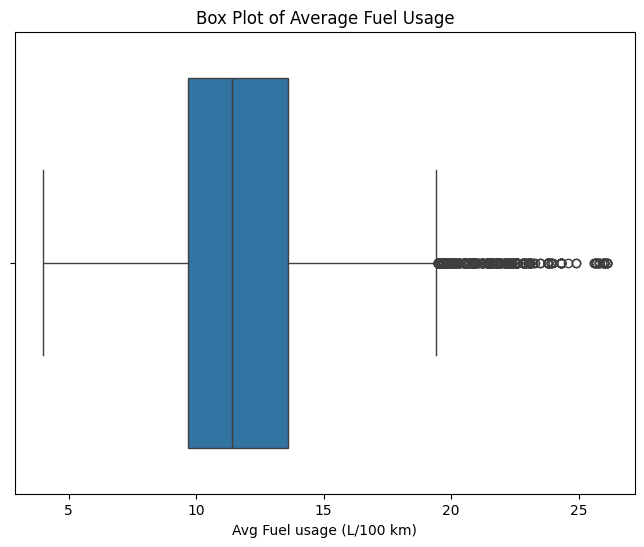

In [ ]:
# @title
# prompt: plot a graph that show outliers

# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=fuel['Avg Fuel usage (L/100 km)'])
plt.title('Box Plot of Average Fuel Usage')
plt.xlabel('Avg Fuel usage (L/100 km)')
plt.show()


The box plot shows the plot of maximum outliers for Average Fuel Usage

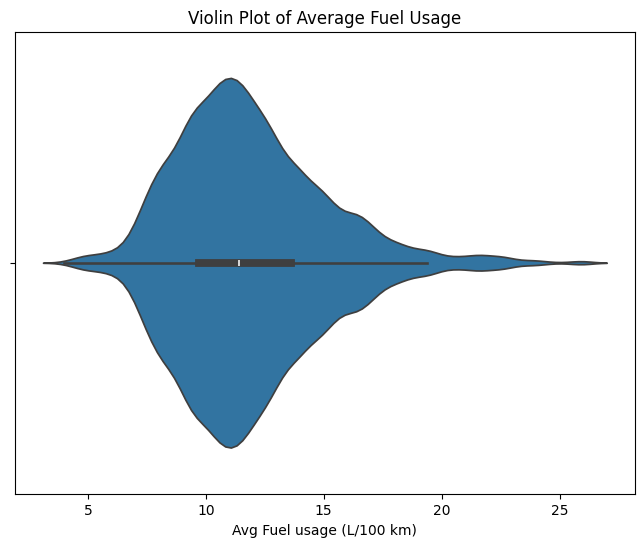

In [ ]:
# @title
# prompt: plot a graph that show outliers in violin

# Violin plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.violinplot(x=fuel['Avg Fuel usage (L/100 km)'])
plt.title('Violin Plot of Average Fuel Usage')
plt.xlabel('Avg Fuel usage (L/100 km)')
plt.show()


To display outliers in violin plot

In [ ]:
# @title
maxoutlier.index

# drop outliers by index

Index([   48,    49,   138,   139,   140,   159,   171,   175,   205,   212,
       ...
       16807, 16808, 16809, 16989, 17293, 17406, 17623, 17765, 18027, 18174],
      dtype='int64', length=477)

In [ ]:
# @title
import pandas as pd
fuel = fuel.drop(maxoutlier.index)

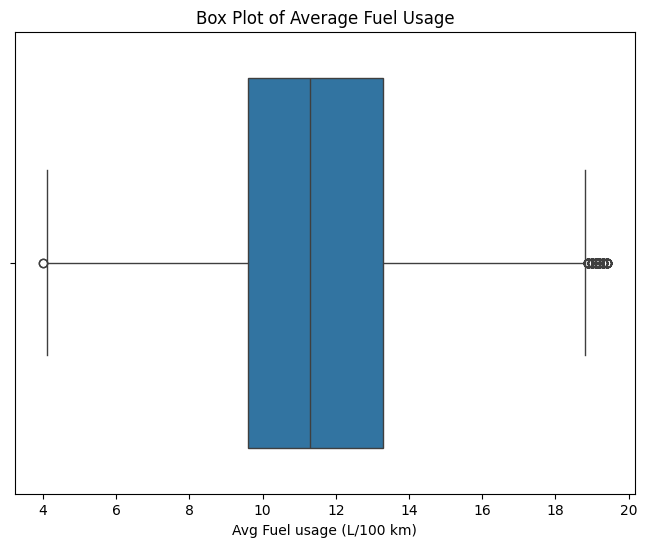

In [ ]:
# @title
# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=fuel['Avg Fuel usage (L/100 km)'])
plt.title('Box Plot of Average Fuel Usage')
plt.xlabel('Avg Fuel usage (L/100 km)')
plt.show()

The box plot shows the plot of Average Fuel Usage after drop the outliers

## 4.2 Fuel Usage Analysis
* Analyze the relationship between engine size, cylinders, and fuel usage at city and highway.
* Identify the most fuel usage vehicles in each class (compact, SUV, wagon, etc.).


In [ ]:
# @title
mean_fuel_usage = fuel['Avg Fuel usage (L/100 km)'].mean()
mean_fuel_usage

NameError: name 'fuel' is not defined

In [ ]:
engine_data = fuel.groupby('Engine size (L)')['Avg Fuel usage (L/100 km)'].mean()
engine_data

Engine size (L)
0.8     5.200000
0.9     6.700000
1.0     6.746154
1.2     6.848649
1.3     8.782090
1.4     7.896316
1.5     7.604545
1.6     7.888679
1.7     8.166667
1.8     8.158840
1.9     7.043750
2.0     9.248387
2.1     7.850000
2.2    10.035165
2.3    10.883566
2.4     9.997152
2.5     9.761700
2.6    12.225000
2.7    11.679290
2.8    12.044231
2.9    11.681366
3.0    11.317824
3.1    12.083333
3.2    12.082143
3.3    12.447895
3.4    11.282857
3.5    11.705112
3.6    12.274606
3.7    12.951654
3.8    12.310084
3.9    13.206557
4.0    13.692033
4.2    14.437333
4.3    15.050000
4.4    13.745487
4.5    15.088235
4.6    14.161194
4.7    14.990576
4.8    14.675460
5.0    14.291866
5.2    15.526446
5.3    15.383832
5.4    16.103704
5.5    15.229545
5.6    15.295122
5.7    14.208268
5.8    13.250000
5.9    17.103030
6.0    15.781787
6.1    16.247826
6.2    14.985675
6.3    15.233333
6.4    14.134667
6.5    18.458333
6.6    16.300000
6.7    16.866667
6.8    18.328571
7.0    13.13750

In [ ]:
# @title
import pandas as pd
# Define the bin edges
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]

# Create a new column with the grouped engine size
Engine_group =  pd.cut(fuel['Engine size (L)'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8])

# Calculate the average fuel consumption for each engine size group
grouped_engine_data = fuel.groupby(Engine_group)['Avg Fuel usage (L/100 km)'].mean()

grouped_engine_data

Engine size (L)
1     7.716864
2     9.355536
3    11.580157
4    13.111721
5    15.004842
6    15.103076
7    16.527642
8    16.235714
Name: Avg Fuel usage (L/100 km), dtype: float64

In [ ]:
# @title
grouped_cylinders_data = fuel.groupby('Cylinders')['Avg Fuel usage (L/100 km)'].mean()
grouped_cylinders_data

Cylinders
2     12.764286
3      7.590173
4      9.237207
5     11.532208
6     11.986370
8     14.635945
10    16.261486
12    16.722941
Name: Avg Fuel usage (L/100 km), dtype: float64

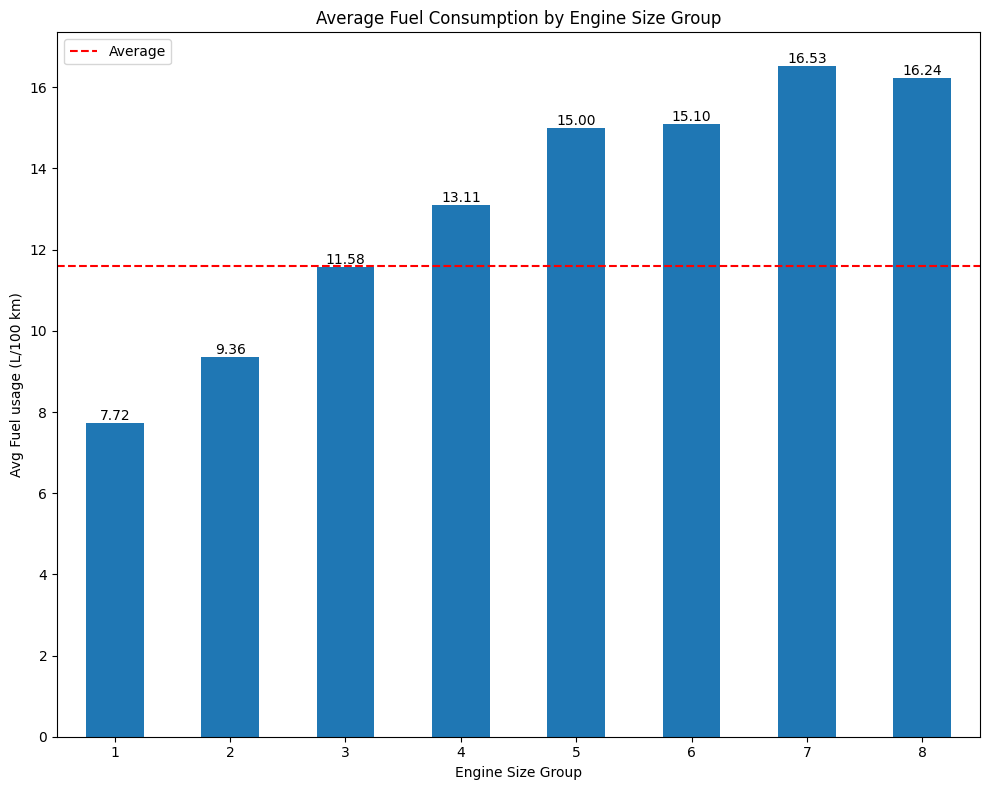

In [ ]:
# @title
import matplotlib.pyplot as plt

# Create a bar plot with values on the bars
plt.figure(figsize=(10, 8))
bars = grouped_engine_data.plot(kind='bar')
plt.xlabel('Engine Size Group')
plt.ylabel('Avg Fuel usage (L/100 km)')
plt.title('Average Fuel Consumption by Engine Size Group')
plt.xticks(rotation=0)

plt.axhline(y= mean_fuel_usage, color='r', linestyle='--', label='Average')
plt.legend(handles=[plt.gca().lines[0]], loc='upper left')
#plt.grid(True)

# Add values on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The graph above shows that as the engine size increases, average fuel consumption also increases.
Smaller engines are more fuel-efficient, consuming less fuel per 100 kilometers.
Larger engines have higher fuel consumption, with the highest average consumption seen in engine size group 7 (16.53 L/100 km) and group 8 (16.24 L/100 km).
The overall average fuel consumption across all engine sizes is approximately 12 L/100 km, as indicated by the red line .

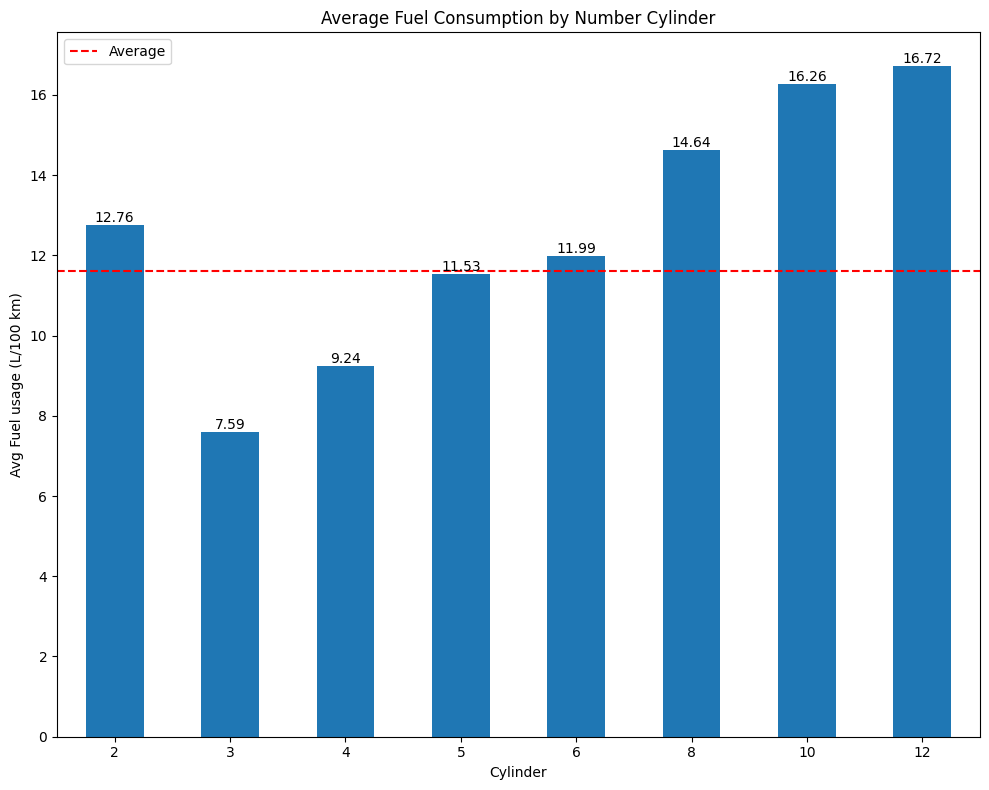

In [ ]:
# @title
import matplotlib.pyplot as plt

# Create a bar plot with values on the bars
plt.figure(figsize=(10, 8))
bars = grouped_cylinders_data.plot(kind='bar')
plt.xlabel('Cylinder')
plt.ylabel('Avg Fuel usage (L/100 km)')
plt.title('Average Fuel Consumption by Number Cylinder')
plt.xticks(rotation=0)

plt.axhline(y= mean_fuel_usage, color='r', linestyle='--', label='Average')
plt.legend(handles=[plt.gca().lines[0]], loc='upper left')
#plt.grid(True)

# Add values on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The graph above shows vehicles with more cylinders generally have higher fuel consumption. This is consistent with the expectation that larger engines (often with more cylinders) consume more fuel.
The 3-cylinder vehicles are the most fuel-efficient, consuming the least fuel per 100 kilometers at 7.59 L/100 km.
The 12-cylinder vehicles have the highest average fuel consumption at 16.72 L/100 km.
The overall average fuel consumption across all cylinder counts is approximately 12 L/100 km, as indicated by the red dashed line.

In [ ]:
# @title
# Group the data by vehicle class and calculate the average fuel usage
class_fuel_usage = fuel.groupby('Vehicle class')['Avg Fuel usage (L/100 km)'].mean().sort_values(ascending=True)

class_fuel_usage

Vehicle class
Station wagon: Small                9.553986
Compact                            10.017538
Sport utility vehicle: Small       10.079489
Mid-size                           10.330556
Special purpose vehicle            10.683871
Subcompact                         10.953170
Minicompact                        11.178240
Station wagon: Mid-size            11.408969
Full-size                          12.104267
Two-seater                         12.348346
Pickup truck: Small                12.403077
Minivan                            12.426690
Sport utility vehicle              13.091348
Sport utility vehicle: Standard    13.246506
Pickup truck: Standard             14.196435
Van: Cargo                         15.969014
Van: Passenger                     17.062810
Name: Avg Fuel usage (L/100 km), dtype: float64

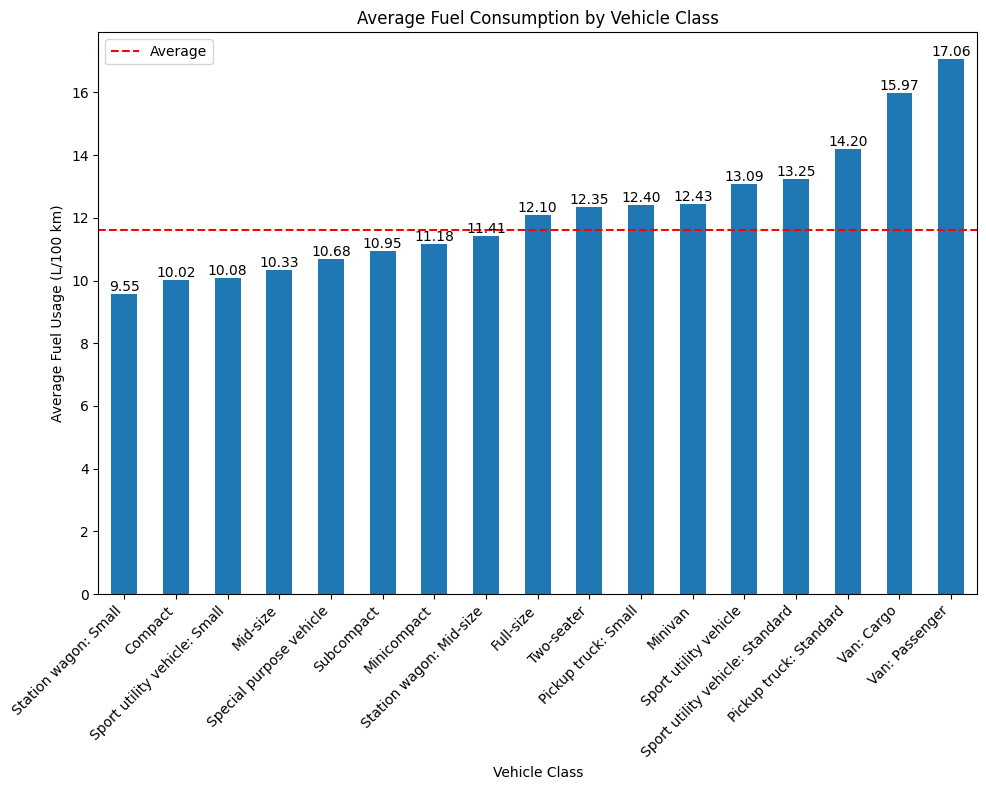

In [ ]:
# @title
import matplotlib.pyplot as plt
# Create a bar plot with values on the bars
plt.figure(figsize=(10, 8))
bars = class_fuel_usage.plot(kind='bar')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Fuel Usage (L/100 km)')
plt.title('Average Fuel Consumption by Vehicle Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.axhline(y= mean_fuel_usage, color='r', linestyle='--', label='Average')
plt.legend(handles=[plt.gca().lines[0]])

# Add values on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The chart shows that the average fuel usage is highest for passenger vans, followed by cargo vans, then pickup trucks. The average fuel usage is lowest for compact cars and station wagons.

To summarize this fuel usage analysis, the larger the engine size and the larger the number of cylinders, the larger its average of fuel usage. Also, the average fuel usage is the lowest for Station wagon:Small class and the average of fuel usage is the highest for Van: Passanger class.

## 4.3 Fuel Efficiency analysis

In [ ]:
# @title
mean_fuel_efficiency = fuel['Fuel efficiency (km/L)'].mean()
print("Mean: ",mean_fuel_efficiency)

Mean:  10.991067565593573


In [ ]:
# @title
engineeff_data = fuel.groupby('Engine size (L)')['Fuel efficiency (km/L)'].mean()
engineeff_data

Engine size (L)
0.8    22.957776
0.9    17.856048
1.0    18.166730
1.2    17.695183
1.3    14.848313
1.4    15.334273
1.5    16.092667
1.6    15.620943
1.7    14.667468
1.8    15.275823
1.9    17.085475
2.0    13.236815
2.1    15.305184
2.2    12.132956
2.3    11.159287
2.4    12.155172
2.5    12.755978
2.6     9.884598
2.7    10.418544
2.8    10.052203
2.9    10.298519
3.0    10.730250
3.1     9.973170
3.2    10.031374
3.3     9.925994
3.4    10.725776
3.5    10.470360
3.6     9.930209
3.7     9.400767
3.8     9.861674
3.9     9.171959
4.0     8.842995
4.2     8.446194
4.3     8.100244
4.4     8.791425
4.5     7.927685
4.6     8.585371
4.7     8.124480
4.8     8.296829
5.0     8.532376
5.2     7.768540
5.3     7.895531
5.4     7.531872
5.5     8.010099
5.6     7.917011
5.7     8.521292
5.8     8.928024
5.9     7.098616
6.0     7.889270
6.1     7.467747
6.2     8.067195
6.3     7.794307
6.4     8.542560
6.5     6.518875
6.6     7.478174
6.7     7.153510
6.8     6.498630
7.0     9.19373

In [ ]:
# @title
import pandas as pd
# Define the bin edges
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]

# Create a new column with the grouped engine size
Engineeff_group =  pd.cut(fuel['Engine size (L)'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8])

# Calculate the average fuel consumption for each engine size group
grouped_engineeff_data = fuel.groupby(Engine_group)['Fuel efficiency (km/L)'].mean()

grouped_engineeff_data

Engine size (L)
1    15.956736
2    13.215545
3    10.524919
4     9.309988
5     8.114672
6     8.087823
7     7.351880
8     7.500755
Name: Fuel efficiency (km/L), dtype: float64

In [ ]:
# @title
grouped_cylinderseff_data = fuel.groupby('Cylinders')['Fuel efficiency (km/L)'].mean()
grouped_cylinderseff_data

Cylinders
2      9.444270
3     16.143185
4     13.428116
5     10.572282
6     10.198094
8      8.327303
10     7.445765
12     7.241203
Name: Fuel efficiency (km/L), dtype: float64

In [ ]:
# @title
# Group the data by vehicle class and calculate the average fuel usage
class_fuel_usage = fuel.groupby('Vehicle class')['Fuel efficiency (km/L)'].mean().sort_values(ascending = True)
class_fuel_usage

Vehicle class
Van: Passenger                      7.076364
Van: Cargo                          7.505887
Pickup truck: Standard              8.662143
Sport utility vehicle: Standard     9.361303
Sport utility vehicle               9.503875
Pickup truck: Small                 9.831572
Minivan                            10.006770
Two-seater                         10.345722
Full-size                          10.582389
Station wagon: Mid-size            10.847845
Minicompact                        11.161420
Subcompact                         11.388415
Special purpose vehicle            11.424031
Sport utility vehicle: Small       12.247408
Mid-size                           12.392948
Compact                            12.648705
Station wagon: Small               13.034380
Name: Fuel efficiency (km/L), dtype: float64

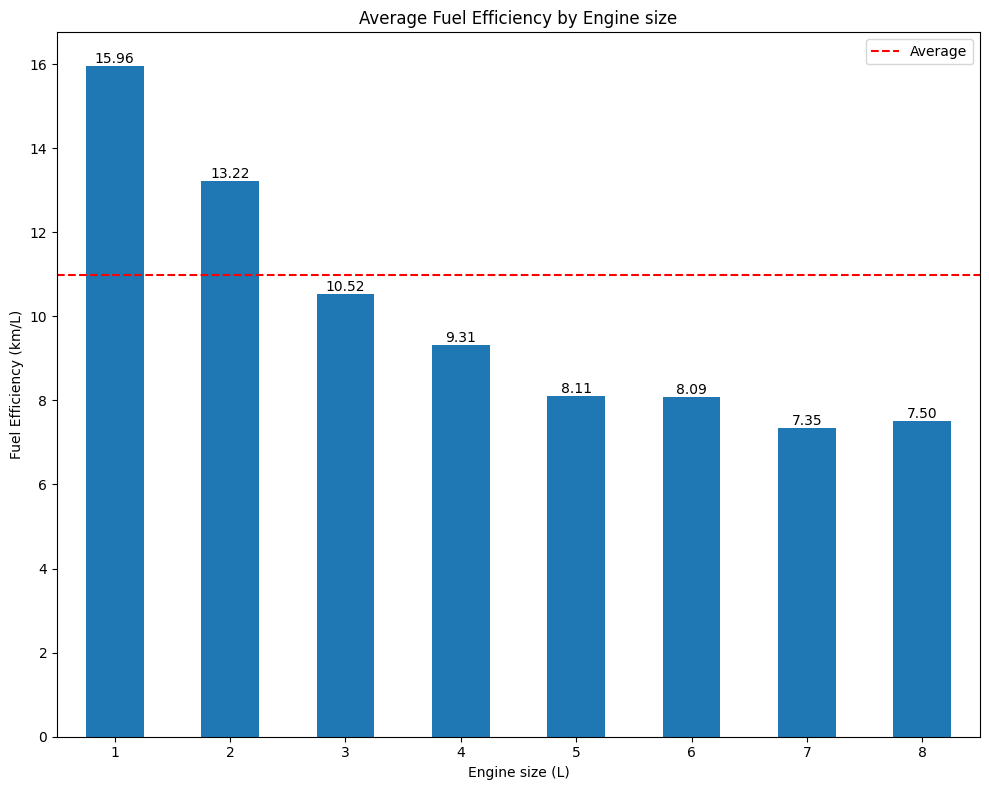

In [ ]:
# @title
import matplotlib.pyplot as plt
# Create a bar plot with values on the bars
plt.figure(figsize=(10, 8))
bars = grouped_engineeff_data.plot(kind='bar')
plt.xlabel('Engine size (L)')
plt.ylabel('Fuel Efficiency (km/L)')
plt.title('Average Fuel Efficiency by Engine size')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.axhline(y=mean_fuel_efficiency, color='r', linestyle='--', label='Average')
plt.legend(handles=[plt.gca().lines[0]])

# Add values on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The graph shows overall average fuel efficiency across all vehicle classes is about 11 km/L. Overall,fuel efficiency generally decreases as the size of engine increases. This is because larger engines require more fuel to operate.

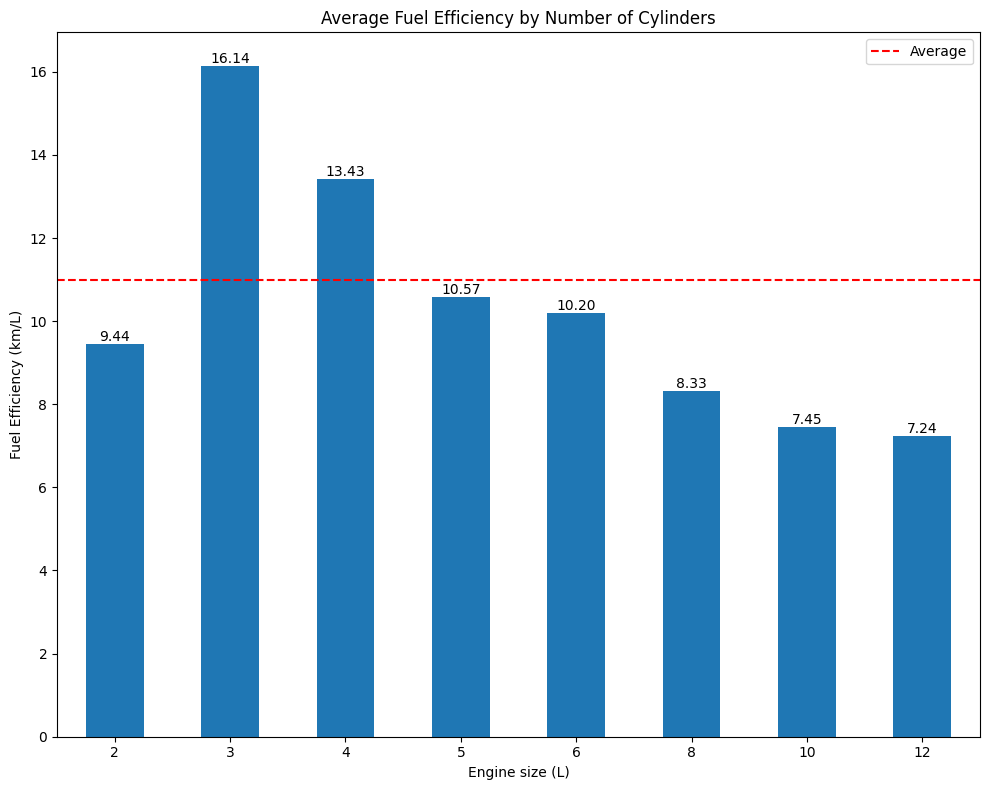

In [ ]:
# @title
import matplotlib.pyplot as plt
# Create a bar plot with values on the bars
plt.figure(figsize=(10, 8))
bars = grouped_cylinderseff_data.plot(kind='bar')
plt.xlabel('Engine size (L)')
plt.ylabel('Fuel Efficiency (km/L)')
plt.title('Average Fuel Efficiency by Number of Cylinders')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.axhline(y=mean_fuel_efficiency, color='r', linestyle='--', label='Average')
plt.legend(handles=[plt.gca().lines[0]])

# Add values on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The graph shows the average fuel efficiency of cars with different numbers of cylinders. As you can see, fuel efficiency generally decreases as the number of cylinders increases. This is because larger engines with more cylinders require more fuel to operate.

The fuel efficiency at 2 cylinders is lower than the average because, although 2 cylinder cars are efficient, they are usually found in smaller, lighter cars.

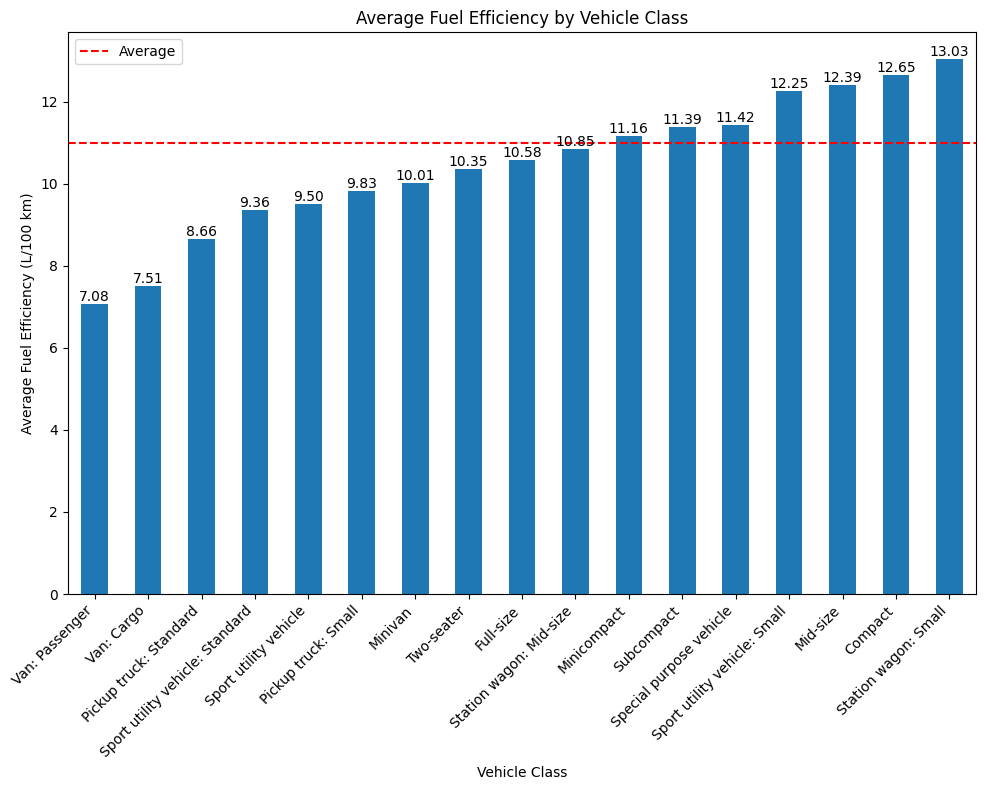

In [ ]:
# @title
import matplotlib.pyplot as plt
# Create a bar plot with values on the bars
plt.figure(figsize=(10, 8))
bars = class_fuel_usage.plot(kind='bar')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Fuel Efficiency (L/100 km)')
plt.title('Average Fuel Efficiency by Vehicle Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.axhline(y=mean_fuel_efficiency, color='r', linestyle='--', label='Average')
plt.legend(handles=[plt.gca().lines[0]])

# Add values on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Station wagons, compact cars, sport utility vehicles, and mid-size vehicles consume less fuel than average, while passenger vans and cargo vans consume the most fuel.

To summarize the fuel efficiency analysis, the larger size of engine and number of cylinders, the lowest its average of fuel efficiency. However, the less efficient fuel goes to Van:passanger while the most efficient fuel goes to Station wagon:small.

## 4.4 Emissions Analysis:
* Are there any correlations between engine size, cylinders, and emissions?

**Fuel Type**

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural Gas

In [ ]:
# @title
mean_co2_emission = fuel['CO2 emissions (g/km)'].mean()
print("Mean: ",mean_co2_emission)

Mean:  265.8616214394067


In [ ]:
# @title
engineco2_data = fuel.groupby('Engine size (L)')['CO2 emissions (g/km)'].mean()
engineco2_data

Engine size (L)
0.8    140.000000
0.9    152.000000
1.0    156.346154
1.2    159.432432
1.3    204.641791
1.4    183.873684
1.5    177.406250
1.6    183.615780
1.7    188.000000
1.8    188.679558
1.9    190.125000
2.0    214.864370
2.1    212.000000
2.2    219.472527
2.3    252.629371
2.4    228.198312
2.5    225.598284
2.6    281.250000
2.7    267.529586
2.8    290.317308
2.9    271.459627
3.0    264.625740
3.1    277.875000
3.2    278.928571
3.3    268.242105
3.4    261.104762
3.5    267.659744
3.6    272.475394
3.7    293.674300
3.8    284.383754
3.9    280.016393
4.0    317.920325
4.2    332.146667
4.3    338.905882
4.4    318.891697
4.5    347.235294
4.6    318.223881
4.7    345.659686
4.8    338.036810
5.0    320.167464
5.2    361.016529
5.3    332.200443
5.4    370.432099
5.5    351.143939
5.6    354.621951
5.7    329.700787
5.8    305.000000
5.9    393.454545
6.0    364.484536
6.1    373.391304
6.2    348.157025
6.3    354.666667
6.4    329.320000
6.5    429.416667
6.6    380.0

In [ ]:
# @title
import pandas as pd
# Define the bin edges
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]

# Create a new column with the grouped engine size
Engineco2_group =  pd.cut(fuel['Engine size (L)'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8])

# Calculate the average fuel consumption for each engine size group
grouped_engineco2_data = fuel.groupby(Engine_group)['CO2 emissions (g/km)'].mean()

grouped_engineco2_data

Engine size (L)
1    179.926036
2    216.349461
3    267.399239
4    297.974768
5    334.357466
6    350.058875
7    383.780488
8    373.857143
Name: CO2 emissions (g/km), dtype: float64

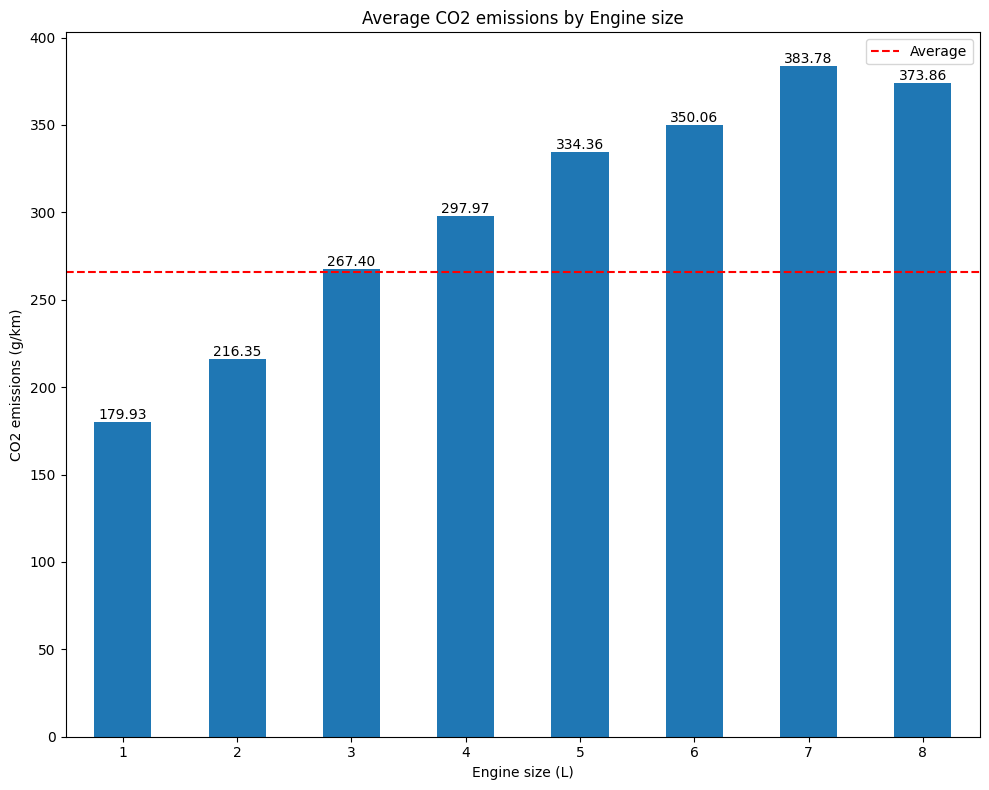

In [ ]:
# @title
import matplotlib.pyplot as plt
# Create a bar plot with values on the bars
plt.figure(figsize=(10, 8))
bars = grouped_engineco2_data.plot(kind='bar')
plt.xlabel('Engine size (L)')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Average CO2 emissions by Engine size')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.axhline(y=mean_co2_emission, color='r', linestyle='--', label='Average')
plt.legend(handles=[plt.gca().lines[0]])

# Add values on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The graph above shows that as the engine size (in liters) increases, the average CO2 emissions (in grams per kilometer) also increase. The red line dashed represents the average overall CO2 emissions across all engines which can be around 250 g/km. This conclude that the larger engines tends to emit more CO2.

In [ ]:
# @title
grouped_cylindersco2_data = fuel.groupby('Cylinders')['CO2 emissions (g/km)'].mean()
grouped_cylindersco2_data

Cylinders
2     293.571429
3     177.578035
4     214.004636
5     265.337662
6     273.863217
8     331.694078
10    376.628378
12    387.617647
Name: CO2 emissions (g/km), dtype: float64

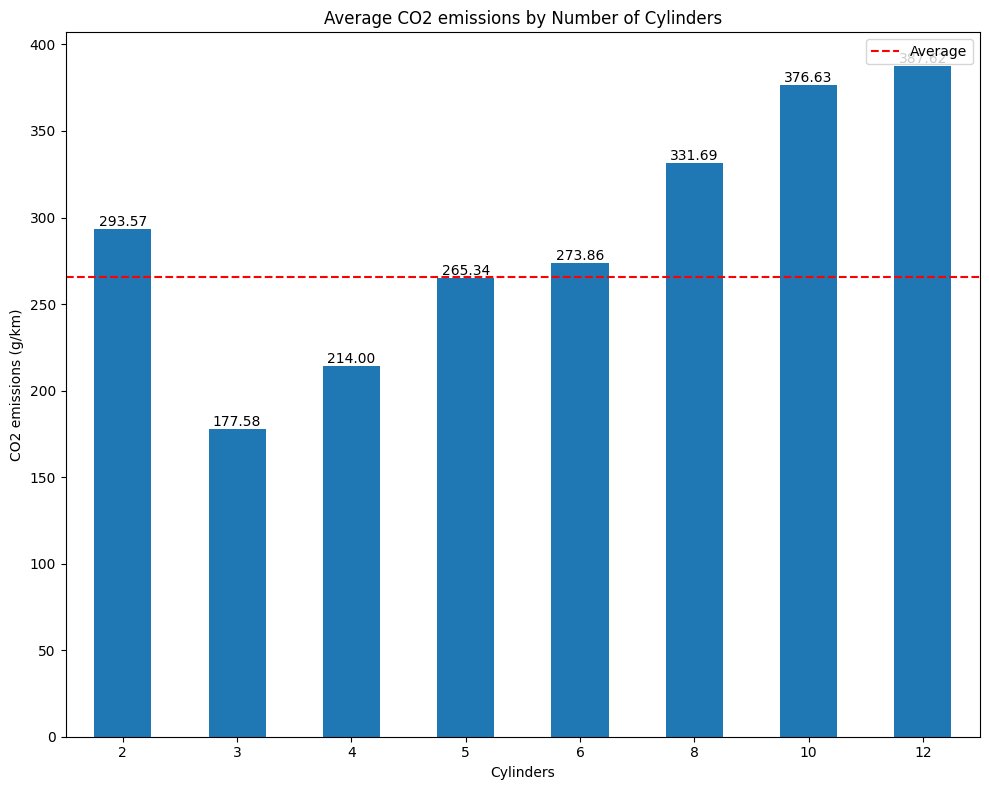

In [ ]:
# @title
import matplotlib.pyplot as plt
# Create a bar plot with values on the bars
plt.figure(figsize=(10, 8))
bars = grouped_cylindersco2_data.plot(kind='bar')
plt.xlabel('Cylinders')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Average CO2 emissions by Number of Cylinders')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.axhline(y=mean_co2_emission, color='r', linestyle='--', label='Average')
plt.legend(handles=[plt.gca().lines[0]])

# Add values on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The graph shows that the average CO2 emissions (in grams per kilometer) generally increase with the number of cylinders. Overall average CO2 emissions across all cylinders counts can be seen from red dashed line which can be around 250 g/km. This conclude that vehicles with more cylinders tend to emit more CO2 compared to vehicles that have lowest number of cylinders.

In [ ]:
# @title
# Calculate average fuel consumption, fuel efficiency, and emissions for each vehicle class
avg_emissions = fuel.groupby('Vehicle class')['CO2 emissions (g/km)'].mean().sort_values(ascending=True)
# Create a new DataFrame to store the results
vehicle_class_summary = pd.DataFrame({
    'Avg CO2 Emissions (g/km)': avg_emissions,

})

# Display the summary DataFrame
pd.set_option('display.max_columns', None)
vehicle_class_summary
avg_emissions

Vehicle class
Station wagon: Small               221.770629
Compact                            231.202885
Sport utility vehicle: Small       234.489717
Mid-size                           237.464957
Special purpose vehicle            237.677419
Subcompact                         253.664783
Minicompact                        258.910820
Station wagon: Mid-size            263.645740
Minivan                            270.131673
Full-size                          274.474235
Two-seater                         286.164397
Pickup truck: Small                289.793407
Sport utility vehicle              296.706869
Sport utility vehicle: Standard    304.235441
Pickup truck: Standard             316.980613
Van: Cargo                         365.492958
Van: Passenger                     391.347107
Name: CO2 emissions (g/km), dtype: float64

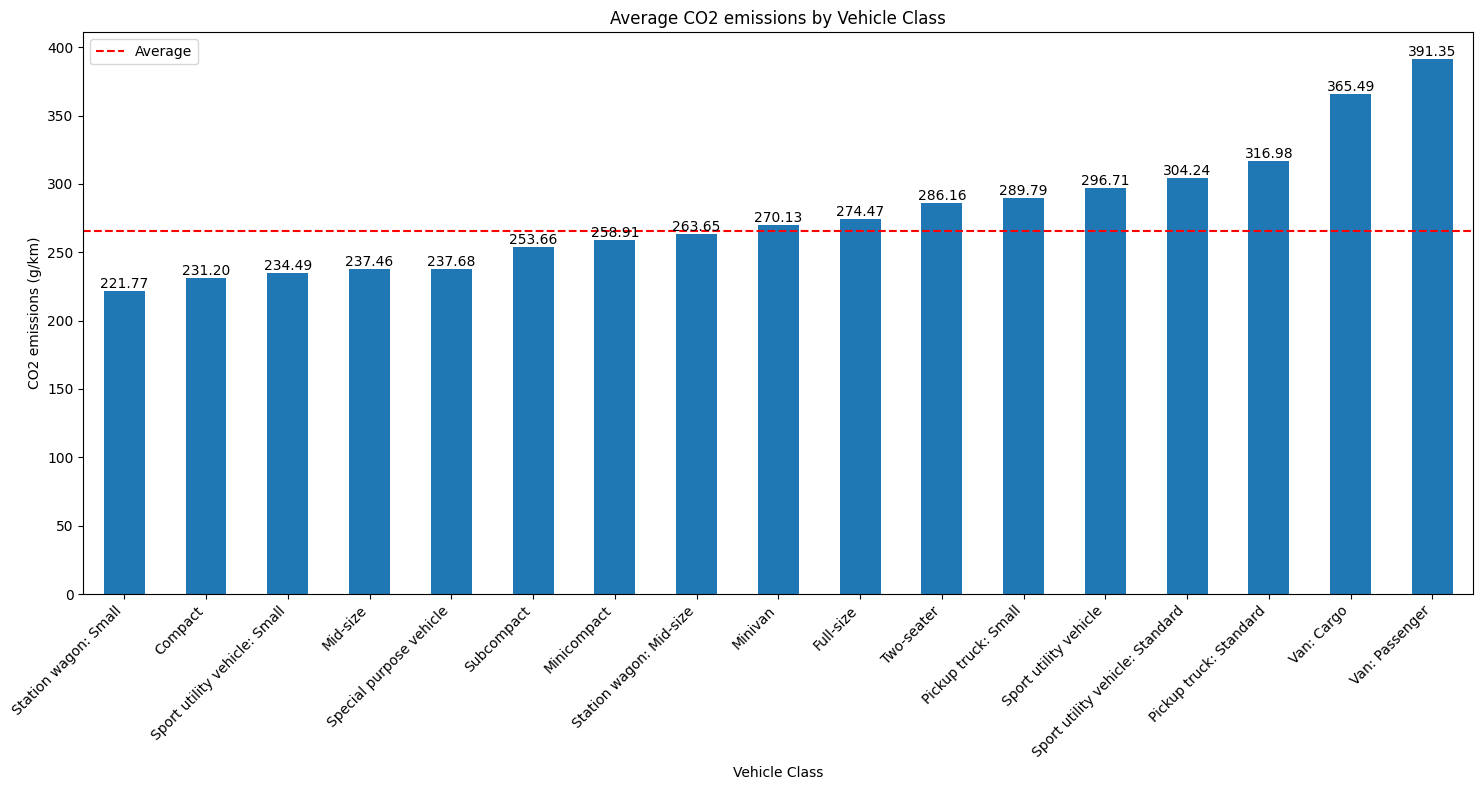

In [ ]:
# @title
import matplotlib.pyplot as plt
# Create a bar plot with values on the bars
plt.figure(figsize=(15, 8))
bars = avg_emissions.plot(kind='bar')
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Average CO2 emissions by Vehicle Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.axhline(y=mean_co2_emission, color='r', linestyle='--', label='Average')
plt.legend(handles=[plt.gca().lines[0]])

# Add values on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

This graph displays various vehicle class with various CO2 emissions for each type of them. Vehicle type Station wagon: small emit the smallest CO2 meanwhile the largest emission CO2 is by Van.

Conclusion for this CO2 emission analysis, its clearly shows that the larger engine size and number cylinders been used, the larger its average of CO2 emissions. Van: passenger is the vehicle type that emit the most CO2 compared to others while Station wagon: small emit the smallest CO2.

## 4.5 Year-over-Year Analysis:
* How have fuel efficiency and emissions changed over the years (2017-2024) for different vehicle models or makes?
* Are there any notable trends or improvements in fuel efficiency and emissions over time?

In [ ]:
# @title
# Calculate average fuel consumption, fuel efficiency, and emissions for each year model
avg_fuel_consumption = fuel.groupby('Model year')['Avg Fuel usage (L/100 km)'].mean()
avg_fuel_efficiency = fuel.groupby('Model year')['Fuel efficiency (km/L)'].mean()
avg_emissions = fuel.groupby('Model year')['CO2 emissions (g/km)'].mean()

# Create a new DataFrame to store the results
Model_year_summary = pd.DataFrame({
    'Avg Fuel usage (L/100 km)': avg_fuel_consumption,
    'Avg Fuel Efficiency (km/L)': avg_fuel_efficiency,
    'Avg CO2 Emissions (g/km)': avg_emissions
})

# Display the summary DataFrame
pd.set_option('display.max_columns', None)
Model_year_summary.head()

Avg Fuel usage (L/100 km)  Avg Fuel Efficiency (km/L)  \
Model year                                                          
2005                        12.657362                    9.886554   
2006                        12.664905                    9.879430   
2007                        12.703486                    9.841830   
2008                        12.566443                    9.965000   
2009                        12.394428                   10.127902   

            Avg CO2 Emissions (g/km)  
Model year                            
2005                      290.379346  
2006                      290.714588  
2007                      289.350598  
2008                      286.066155  
2009                      282.207493

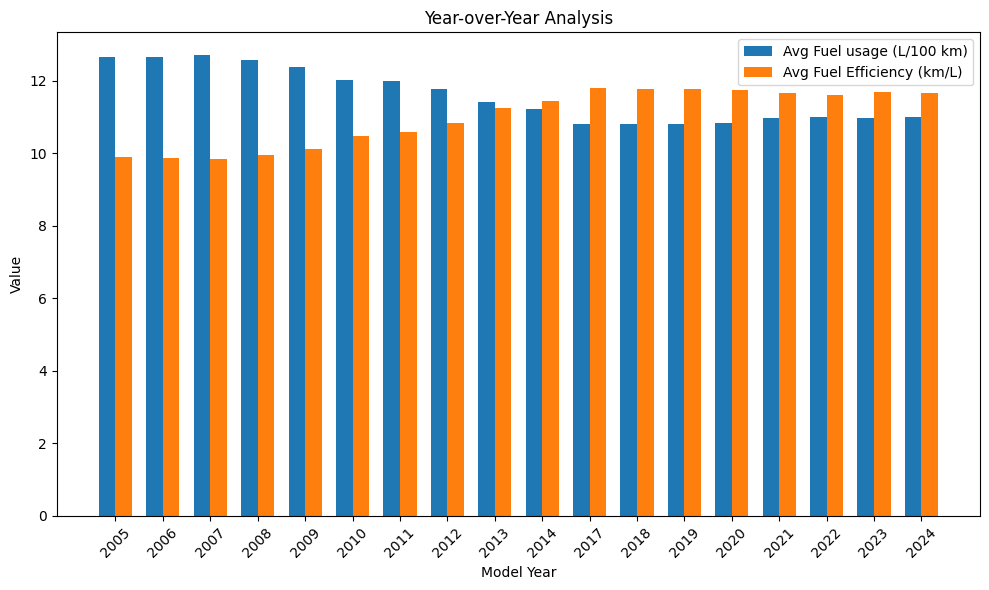

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np

# Data
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
fuel_usage = [12.6, 12.8, 12.9, 12.7, 12.4, 12.3, 12.1, 11.9, 11.8, 11.5, 11.2, 10.9, 10.7, 10.5, 10.4, 10.3, 10.2, 10.1]
fuel_efficiency = [9.9, 9.8, 9.7, 9.6, 9.5, 9.4, 9.3, 9.2, 9.1, 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1]

years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
fuel_usage = Model_year_summary['Avg Fuel usage (L/100 km)']
fuel_efficiency = Model_year_summary['Avg Fuel Efficiency (km/L)']

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(years)), fuel_usage, label="Avg Fuel usage (L/100 km)", width=0.35)
plt.bar(np.arange(len(years)) + 0.35, fuel_efficiency, label="Avg Fuel Efficiency (km/L)", width=0.35)

# Add labels and title
plt.xlabel("Model Year")
plt.ylabel("Value")
plt.title("Year-over-Year Analysis")
plt.xticks(np.arange(len(years)) + 0.35 / 2, years, rotation=45)
#plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

This is the analysis of how our vehicles from 20025 until 2024 affects the consumption of fuel and the efficiency of fuel. From the graph, it shows that throughout the year, the consumption of fuel have been decreasing while the efficiency of the fuel is increasing. Its indicates that our models are improving and could achieve requirement and satisfaction of customers in the market.

# Step 5: Build Predictive Model
- **Select a model**: Choose a suitable predictive model based on the problem, data, and objectives. This may include regression, decision trees, random forests, or neural networks.
- **Train the model**: Train the model using the prepared data, and tune the hyperparameters to optimize performance.
- **Evaluate the model**: Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score.

**Select a Model**

**Examples:**
* Predict fuel efficiency based on engine size and cylinders using:
* 1. Linear Regression
* 2. Decision Trees Regression
* 3. Random Forests Regression

**Steps:**
* Split the data into training and testing sets
* Feed the training data into the chosen model (e.g., linear regression, decision trees, random forest).
* Tune the hyperparameters to optimize performance (e.g., learning rate, number of hidden layers).
* Train the model using the training data.
* Determine which model is the best to predict the target

In [ ]:
# @title
import matplotlib.pyplot as plt
from sklearn import metrics
fuel.head()

Model year   Make    Model          Vehicle class  Engine size (L)  \
0        2005  Acura    1.7EL                Compact              1.7   
1        2005  Acura    1.7EL                Compact              1.7   
2        2005  Acura  MDX AWD  Sport utility vehicle              3.5   
3        2005  Acura      NSX             Two-seater              3.0   
4        2005  Acura      NSX             Two-seater              3.2   

   Cylinders Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0          4           A4         X              9.2                 7.2   
1          4           M5         X              9.1                 7.3   
2          6           A5         Z             15.9                11.1   
3          6          AS4         Z             15.1                10.5   
4          6           M6         Z             15.1                10.5   

   Avg Fuel usage (L/100 km)  Fuel efficiency (km/L)  CO2 emissions (g/km)  \
0                        8.3               14.454896                   191   
1                        8.3               14.454896                   191   
2                       13.7                8.928024                   315   
3                       13.0                9.353168                   299   
4                       13.0                9.353168                   299   

  Fuel Efficiency Category  
0                   Medium  
1                   Medium  
2                      Low  
3                      Low  
4                      Low

In [ ]:
# @title
# prompt: fuel correlations

# Calculate correlations for numerical columns
numerical_cols = fuel.select_dtypes(include=[np.number]).columns
correlations = fuel[numerical_cols].corr()
plt.figure(figsize=(10, 8))
# Display the correlation matrix
print(correlations)


                           Model year  Engine size (L)  Cylinders  \
Model year                   1.000000        -0.116444  -0.093005   
Engine size (L)             -0.116444         1.000000   0.915851   
Cylinders                   -0.093005         0.915851   1.000000   
City (L/100 km)             -0.254416         0.823194   0.802521   
Highway (L/100 km)          -0.207833         0.766990   0.720547   
Avg Fuel usage (L/100 km)   -0.241601         0.814835   0.784705   
Fuel efficiency (km/L)       0.245313        -0.741268  -0.705201   
CO2 emissions (g/km)        -0.213519         0.826974   0.805197   

                           City (L/100 km)  Highway (L/100 km)  \
Model year                       -0.254416           -0.207833   
Engine size (L)                   0.823194            0.766990   
Cylinders                         0.802521            0.720547   
City (L/100 km)                   1.000000            0.938625   
Highway (L/100 km)                0.938625      

<Figure size 1000x800 with 0 Axes>

<Axes: >

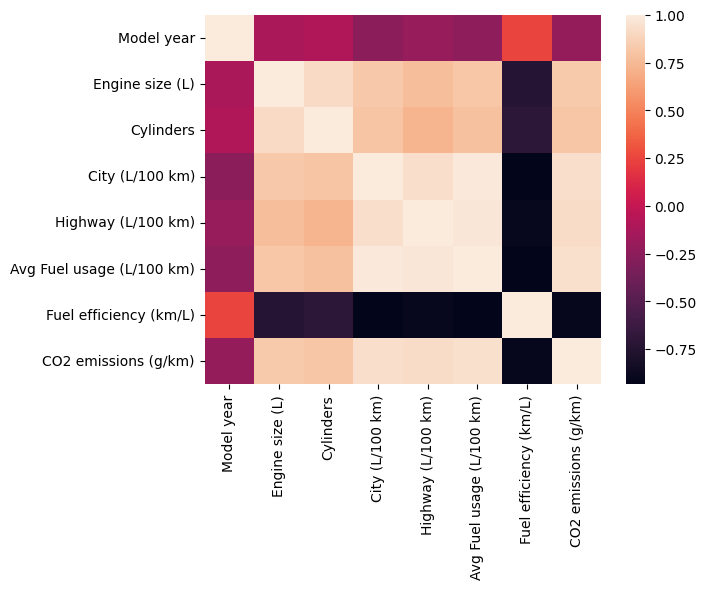

In [ ]:
sns.heatmap(correlations)

## 5.1 Linear Regression
Predict fuel efficiency based on engine size, cylinders, and other numerical features

In [ ]:
# @title
# X_train,X_test,y_train,y_test,
# predict fuel efficiency based on engine size, cylinders, and other numerical features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

X = fuel[['Engine size (L)','Cylinders']]
y = fuel['Fuel efficiency (km/L)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae_LR = mean_absolute_error(y_test, y_pred)
mse_LR = mean_squared_error(y_test, y_pred)
rmse_LR = np.sqrt(mse_LR)
r2_LR = r2_score(y_test, y_pred)


print("LinearRegression - Mean Absolute Error:", mae_LR)
print("LinearRegression - Mean Squared Error:", mse_LR)
print("LinearRegression - Root Mean Squared Error:", rmse_LR)
print("LinearRegression - R-squared:", r2_LR)

LinearRegression - Mean Absolute Error: 1.3237884608930999
LinearRegression - Mean Squared Error: 3.731948456455431
LinearRegression - Root Mean Squared Error: 1.9318251619790625
LinearRegression - R-squared: 0.5511794471931878


## 5.2: Decision Tree Regression
Predict fuel efficiency based on engine size, cylinders, and other numerical features

In [ ]:
# @title
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = fuel[['Engine size (L)','Cylinders']]
y = fuel['Fuel efficiency (km/L)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Regressor
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

mae_DT = mean_absolute_error(y_test, y_pred_tree)
mse_DT = mean_squared_error(y_test, y_pred_tree)
rmse_DT = np.sqrt(mse_DT)
r2_DT = r2_score(y_test, y_pred_tree)

print("Random Forest - Mean Absolute Error:", mae_DT)
print("Decision Tree - Mean Squared Error:", mse_DT)
print("Decision Tree - Root Mean Squared Error:", rmse_DT)
print("Decision Tree - R-squared:", r2_DT)

Random Forest - Mean Absolute Error: 1.093657906665688
Decision Tree - Mean Squared Error: 2.7687582398179074
Decision Tree - Root Mean Squared Error: 1.6639586051996327
Decision Tree - R-squared: 0.6670169434859314


## 5.3 Random Forest Regression
Predict fuel efficiency based on engine size, cylinders, and other numerical features

In [ ]:
# @title
# prompt: random forest for improving accuracy in predicting fuel efficiency

from sklearn.ensemble import RandomForestRegressor

X = fuel[['Engine size (L)','Cylinders']]
y = fuel['Fuel efficiency (km/L)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Absolute Error:", mae_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - Root Mean Squared Error:", rmse_rf)
print("Random Forest - R-squared:", r2_rf)

Random Forest - Mean Absolute Error: 1.0936497290674319
Random Forest - Mean Squared Error: 2.7683694751097763
Random Forest - Root Mean Squared Error: 1.6638417818740387
Random Forest - R-squared: 0.6670636980414273


**Recommendation System:** Develop a recommendation system that suggests the most fuel-efficient based on Engine Size and Cylinder.

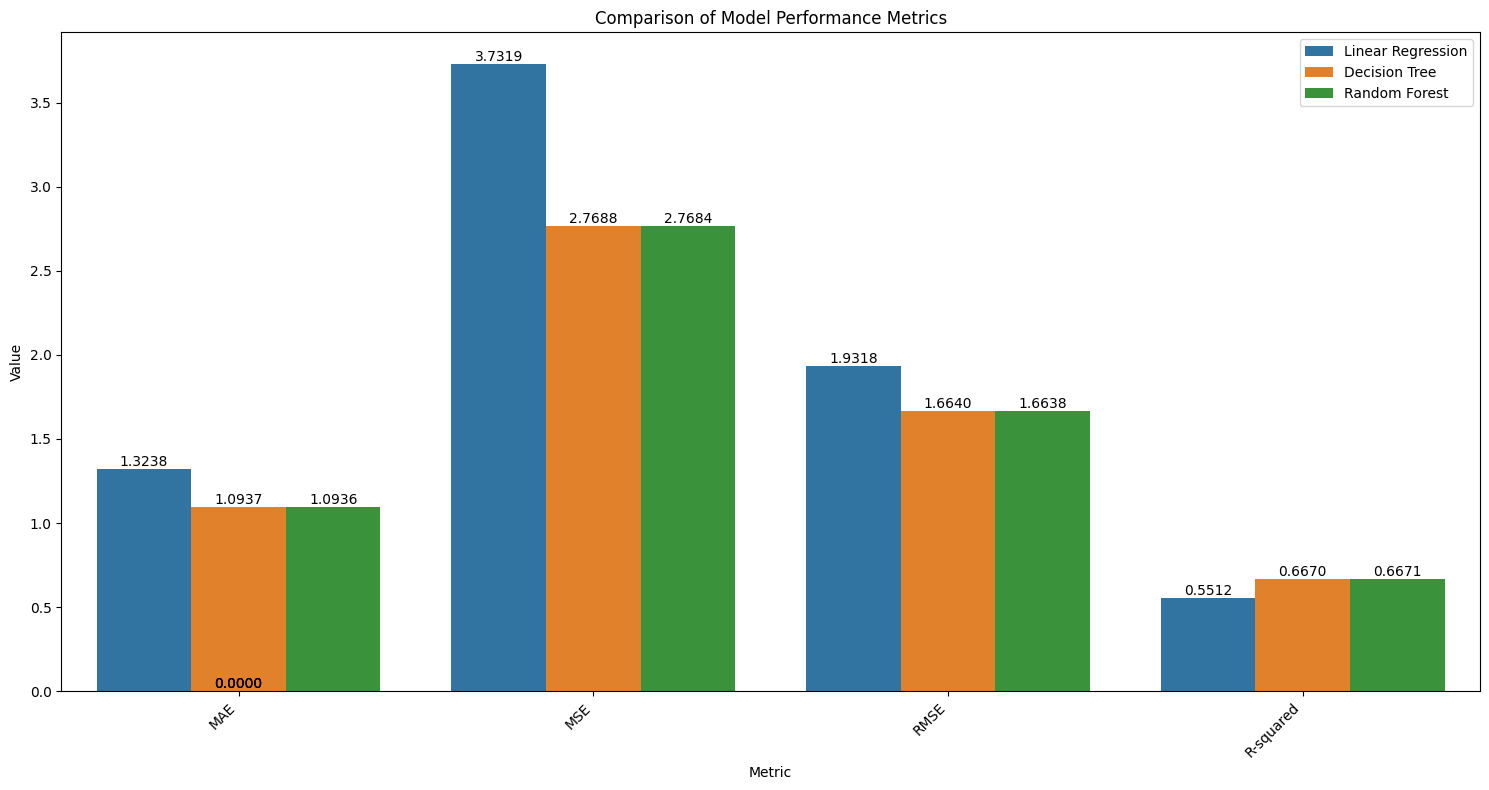

In [ ]:
# @title
# Create a dictionary to store the metrics
metrics_data = {
    'Model': ['Linear Regression', 'Decision Tree' ,'Random Forest'],
    'MAE': [mae_LR,mae_DT, mae_rf],
    'MSE': [mse_LR, mse_DT, mse_rf],
    'RMSE': [rmse_LR, rmse_DT, rmse_rf],
    'R-squared': [r2_LR, r2_DT, r2_rf]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_data)

# Melt the DataFrame to long format for plotting
metrics_df_melted = pd.melt(metrics_df, id_vars='Model', var_name='Metric', value_name='Value')

# Plot the bar graph
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df_melted)
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom')

plt.show()

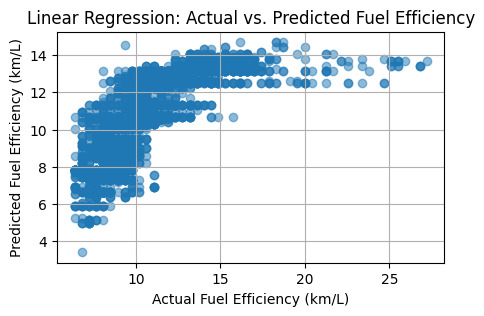

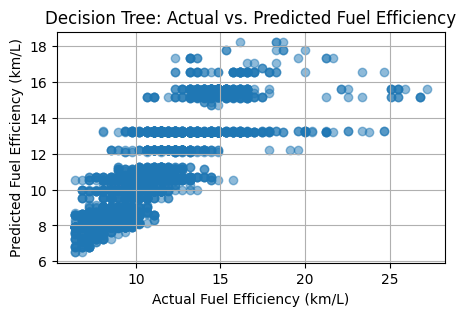

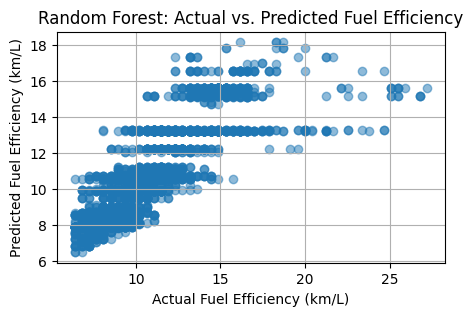

In [ ]:
# @title
# prompt: plot the graph for linear regression model and random forest model
# Plot for Linear Regression
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Fuel Efficiency (km/L)")
plt.ylabel("Predicted Fuel Efficiency (km/L)")
plt.title("Linear Regression: Actual vs. Predicted Fuel Efficiency")
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.xlabel("Actual Fuel Efficiency (km/L)")
plt.ylabel("Predicted Fuel Efficiency (km/L)")
plt.title("Decision Tree: Actual vs. Predicted Fuel Efficiency")
plt.grid(True)
plt.show()

# Plot for Random Forest
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Fuel Efficiency (km/L)")
plt.ylabel("Predicted Fuel Efficiency (km/L)")
plt.title("Random Forest: Actual vs. Predicted Fuel Efficiency")
plt.grid(True)
plt.show()


# Step 6: Conclusion

* This project is important to provide valueable insight for cars companies to get better understanding on how the features in cars effect the fuel efficiency, fuel usage and CO2 emmission
* The predictive model created shows it ability to predict the fuel efficiency by inserting features into the model.
* However, more features must be included in the training model to make the model prediction more accurate and reduce errors.
* Since Random Forest model show the highest score among others, so it can be choosen to build predictive model, resulting better result than other models.
* In real case, car companies can use our system to plan their new car model prediction so that they can make sure their future products produce more fuel efficience cars and stay competetive in automotive industry
